<div align="center">
    <img src="https://logoyab.com/wp-content/uploads/2024/08/IUST-University-Logo-1030x1030.png" alt="Logo" width="200">
    <p><b>Project2 @ AI Course, Dr. Abdi</b></p>
    <p><b>ِDesinged by kasra shariati & Amirhossein Hosseini</b></p>
</div>

--------


*Full Name:* [محمدمهدی شریف‌بیگی][(sharifbeigymohammad@gmail.com)](https://github.com/MohammadMahdi-Sharifbeigy)

*Student Number:* 402300068

------

**Welcome to the Second AI assignment (:**

In [6]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
from tqdm.notebook import tqdm
from copy import deepcopy
import seaborn as sns
import torchvision
import torchvision.transforms as transforms
import torch
import time
from tqdm.notebook import tqdm

try:
    import plotly.graph_objects as go
except ModuleNotFoundError:
    print("Plotly not found. Attempting to install...")
    
    try:
        import sys
        import subprocess
        
        subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly"])
        
        import plotly.graph_objects as go
    except Exception as e:
        print(f"Failed to install Plotly. Error: {e}")
        print("Please install Plotly manually using: pip install plotly")

%matplotlib inline

seed = 1
np.random.seed(seed)

# Part I - Data pre-processing + linear regression

## Normalization

Normalizing the data is a good practice. Normalization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Normalizing features helps us in training the model faster.

The formula for Normalizing the data is given below:

# $X′= \frac{X−μ}{σ}\hspace{4cm}-(a)$

where

μ : mean of the attribute

σ : standard deviation of the attribute

Numpy provides functions to implement the above

For additional information refer [this](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff).

Note: You do not need to normalize Y

### Here I changed Standarize to normalize according to the refer this formula called normalization 

In [7]:
def normalization(X):
    """
    Args:
        'X': numpy ndarray
    Returns:
        'X_norm': normalized X also in numpy ndarray format
    """
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    if np.isscalar(std_X) and std_X == 0:
        std_X = 1
    elif isinstance(std_X, np.ndarray):
        std_X[std_X == 0] = 1
    X_norm = (X - mean_X) / std_X

    return X_norm

    raise NotImplementedError()

In [8]:
# Sample test cases
np.random.seed(seed)
x = np.random.randint(0, 100, size = 10)
x = normalization(x)
assert np.allclose(x[1], -0.8183755)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


here is the new standardize method that is based what is it in this [website](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

this standarization will return datas with mean zero and standard devitayion 1 

In [9]:
def standardize(data):
    data_array = np.array(data, dtype=float)
    
    mean = np.mean(data_array,axis=0)
    
    # Calculate the standard deviation
    std_dev = np.std(data_array, axis=0) + 1e-8  # Adding a small value to avoid division by zero
       
    standardized_data = (data_array - mean) / std_dev
    
    return standardized_data

In [10]:
# Sample test cases
np.random.seed(seed)
x = np.random.randint(0, 100, size = 10)
x = standardize(x)
assert np.allclose(x[1], -0.8183755)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [11]:
# hidden test cases. Do not modify

## Initialize parameters

As uncomplicated it may seem, initializing your weights play an important role in overall performance of your model. If initial wts. are too small/large then it may lead to problem of vanishing/emploding gradients respectively.

For introductory purpose, we will be taking weights from Gaussian Distribution. But there are has been tremendous research in this area, and Xavier Initialization has proved to be very effective for multiple tasks. There are in-built methods for Xavier initialization in frameworks like tensorflow, pytorch, caffe. To understand the maths behind Xavier Initialization, refer to the article attached below!

Refer to this article to understand the importance of effective initialization. [deeplearning.ai/notes](https://www.deeplearning.ai/ai-notes/initialization/#IV)

For our model we will be initialising Weights as an array or random integers and bias as array of zeroes. You can take help of formula $(i)$ from the next section's theory i.e. forward to know the relation between the dimensions of W and b with respect to X and Y.

###
Initialise weights with the shape given in function below having values **between 0 and 1** using numpy.random.rand function.

(NOTE : USE **numpy.random.rand** function for this. Different functions can create different random values and this might result in your code not passing the test cases)

> Initialise bias with the shape given below as a numpy array having all zeros.

In [12]:
def initialize_parameters(X, Y):
    """
    Args:
    'Y': ndarray of shape (m,output_size)
    'X': ndarray of shape (m, no. of features)
    Returns:
    'W', 'b': Wts. and biases
    'W' : ndarray of shape(no. of features, output_size)
    'b' : ndarray of shape(1, output_size)

    USE output_size = 1 since we are only predicting median_house_value.
    IF we predicting say house price and no of people that can stay in it, then we would require output_size = 2 and so on.
    """
    n_features = X.shape[1]
    output_size = Y.shape[1]
    
    W = np.random.rand(n_features, output_size)
    
    b = np.zeros((1, output_size))
    
    return W, b

In [13]:
def xavier_init(X, y):
    """
    Initialize weights and biases for a neural network layer using Xavier/Glorot initialization.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Input data matrix, shape (n_samples, n_features)
    y : numpy.ndarray
        Output target matrix, shape (n_samples, n_outputs)
    
    Returns:
    --------
    weights : numpy.ndarray
        Weight matrix with shape (n_features, n_outputs)
    bias : numpy.ndarray
        Bias vector with shape (1, n_outputs)
    """
    num_features = X.shape[1]
    output_size = y.shape[1]
    
    W = np.random.rand(num_features, output_size)
    
    b = np.zeros((1, output_size))
    
    return W, b

In [14]:
# sample test case
W_check, b_check = xavier_init(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
np.random.seed(seed)
W_check, b_check = xavier_init(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.417022004702574])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [15]:
# sample test case
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
np.random.seed(seed)
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.417022004702574])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [16]:
# hidden test cases. Do not modify

## Forward

This is the function where actual calculation of the prediction values happen with the help of weights and bias.

For two varaibles it is a straight line of form $y = mx + c$ there m and c are slope and intercepts of line respectively but for more than one variables since each variable contributes to the output value the equation becomes a dot product of weights with the variables. Where each weight ($w_i$) represent the propotionality factor of prediction values with respect to the corresponding variable ($x_i$). $b$ is refered as bias which is analogus to the intercept value in case of two variables.

# $ \boxed{Y_{pred} = w_1 x_1 + w_2 x_2 + .... + w_i x_i + b}\hspace{4cm} -(i)$

or

# $ Y_{pred} = X \cdot W + b$

In [17]:
def forward(X, W, b):
    """
    Args:
    'X': ndarray of shape (m,no.of features)
    'W': ndarray of shape (no. of features, output_size)
    'b': ndarray of shape (1, output_size)
    Returns:
    calculated Y_pred value using X,W and b
    """
    Y_pred = np.dot(X,W) + b
    return Y_pred
    raise NotImplementedError()

In [18]:
#sample test case
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
X_test = np.random.randn(2,1)
np.random.seed(seed+1)
W_test = np.random.randn(1,2)
np.random.seed(seed+2)
b_test = np.random.randn(1,2)
forward_test = forward(X_test, W_test, b_test)
assert np.allclose(forward_test, [[1.1116698 , 0.34511309],[2.04358276, 0.47093144]])
print('Sample Test passed', '\U0001F44D')


Sample Test passed 👍


In [19]:
# hidden test cases. Do not modify

## Loss

A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. There is not a single loss function that works for all kind of data. It depends on a number of factors including the presence of outliers, choice of machine learning algorithm, time efficiency of gradient descent, ease of finding the derivatives and confidence of predictions.

For our dataset, we have chosen Mean Square Error because of its ease of implementation and competitive performance with other loss functions.

# $ MSE = \frac{\sum_{i = 1}^{m} ({Y^{pred}_i - Y^{true}_i})^2}{2m}$

here $Y^{pred}_i$ is the $i^{th}$ prediction value corresponding to $i^{th}$  $Y^{true}_i$ (actual)value.
$m$ is the number of actual values

In [20]:
def compute_Loss(AL, Y, parameters=None, lambd=0):
    """
    Compute the cross-entropy Loss
    
    Parameters:
    AL -- probability vector of shape (num_classes, number of examples)
    Y -- true labels vector of shape (num_classes, number of examples)
    parameters -- dictionary containing the parameters (optional, for L2 regularization)
    lambd -- regularization parameter (default is 0)
    
    Returns:
    Loss -- cross-entropy Loss with regularization
    """
    m = Y.shape[1]
    
    # Cross-entropy Loss
    Loss = -np.sum(Y * np.log(AL + 1e-8)) / m
    
    # Add L2 regularization if parameters are provided
    if parameters is not None and lambd > 0:
        L = len(parameters) // 2
        l2_Loss = 0
        for l in range(1, L + 1):
            l2_Loss += np.sum(np.square(parameters[f'W{l}']))
        Loss += (lambd / (2 * m)) * l2_Loss
    
    return Loss

def mse_Loss(AL, Y):
    """
    Compute the Mean Squared Error Loss
    
    Parameters:
    AL -- output of the network
    Y -- true labels
    
    Returns:
    Loss -- MSE Loss
    """
    m = Y.shape[0]
    Loss = np.sum((AL - Y) ** 2) / (2 * m)
    return Loss

In [21]:
#sample test case
np.random.seed(seed)
y1 = np.random.randn(10,1)
np.random.seed(seed+1)
y2 = np.random.randn(10,1)
mse_sample = mse_Loss(y1, y2)
assert np.allclose(mse_sample, 1.38652357)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [22]:
# hidden test cases. Do not modify

## Gradients

In order to optimise our model and increase it's accuracy we will use a technique called **Stochastic Gradient Decent**(SGD). As per wikipedia Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. From this we understand that we would be minimising the error between our prediction values and actual values.
But before that we need to calculate our prediction values using the same formula as in the forward function.

Now after getting certain value of loss in our first prediction we would change our weights and bias in a manner that our loss reduces.

# $W_j = W_{j-1} - \frac{\partial L(Y_p)}{\partial W}$

where $W_j$ stands for weight at $j^{th}$ iteration and $\frac{\partial L(Y_p)}{\partial W}$ stands for partial derivative of Loss function with respect to weights. Above formula upon partial differentiation simplifies to

# $\boxed{W_j = W_{j-1} - \alpha * dW }     \hspace{3cm}    -(ii)$

where $\alpha$ is a constant called **learning rate** and dW is the partial derivative part given by the following formula

# $ dW = \frac{\partial L(Y_p)}{\partial Y}\frac{\partial Y}{\partial W} = \frac{2((WX + b) - Y_t)}{2m}* (X)  $

or:

# $ dW = \frac{\partial L(Y_p)}{\partial W} =  \frac{X^T*(Y_p - Y_t)}{m}  $

The $ {X^T} $ implies Transpose of  $ X $ (Just try to matrix multiply $ X $ directly with  $ (Y_p - Y_t) $ and you'll understand why we need to use transpose of X in multiplication)

<br/>
Similar analysis can be done for bias(b)

# $b_j = b_{j-1} - \frac{\partial L(Y_p)}{\partial b}$

which can also be written as

# $\boxed{b_j = b_{j-1} - \alpha * db }      \hspace{3cm}    -(iii)$

# $ db = \frac{\partial L(Y_p)}{\partial b} =  \sum\frac{(Y_p - Y_t)}{m}  $

$dW$ and $db$ are together refered as gradients

In [23]:
def grads(X, y_pred, y_true):
    """
    Args:
    'X': The input matrix
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true house prices
    Returns:
    'dW': gradients of weights
    'db': gradient of biases
    """
    
    m = X.shape[0]
    
    diff = y_pred - y_true
    
    # Calculate gradients for weights
    dW = (X.T.dot(diff)) / m
    
    # Sum the differences and divide by number of examples
    db = np.sum(diff, axis=0) / m
    db = np.reshape(db, (1,-1))
    
    return dW, db

In [24]:
#sample Test Case for function grads
np.random.seed(seed)
X_test = np.random.randn(6,3)
np.random.seed(seed+1)
y_pred_test = np.random.randn(6,1)
np.random.seed(seed+2)
y_true_test = np.random.randn(6,1)
gradsop = grads(X_test,y_pred_test,y_true_test)
assert np.allclose(gradsop[0],[[-1.13308432],[ 1.40189064],[-1.15382273]])
assert np.allclose(gradsop[1],-0.5716881366021288)
print('Hidden Test passed', '\U0001F44D')

Hidden Test passed 👍


In [25]:
# hidden test cases. Do not modify

## Stochastic Gradient Decent

After calculating gradients of weights and bias, we will now do the changes in their respective values with the help of expressions $(ii)$ and $(iii)$ discussed above.
Learning Rate ($\alpha$) gives the measure of The amount that the weights are updated during training. Its value lies between 0.0 and 1.0.

The weights are now updated via the learning rules:

$$ W = W - \alpha \text{ } dW $$
$$ b = b - \alpha \text{ } db $$

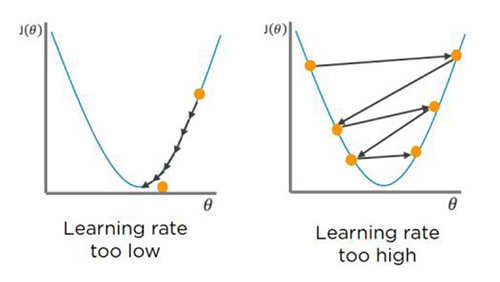

In the above two graphs we see the effect of high learning rates and effect of low learning rates. Each arrow depicts the change in the value at each subsequent step. A higher learning rate might saturate fast towards the local minimum where as the low learning rate takes much more iterations. But high learning rate might also start moving away from the local minimum hence increasing the loss.


In [26]:
def sgd(W, b, grads, alpha):
    """
    Args:
    'W' : (n, output_size) array
    'b' : (1,output_size)
    'grads': list of dW, db
    'alpha': learning rate
    Return:
    Updated parameters
    updated_w : updated value of 'W' using the formula given above
    updated_b : updated value of 'b' using the formula given above
    """
    dW, db = grads[0], grads[1]
    
    updated_w = W - alpha * dW
    
    updated_b = b - alpha * db
    
    return updated_w, updated_b

In [27]:
#Sample test case for function sgd
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
w_test = np.random.randn(2,1)
np.random.seed(seed+1)
b_test = np.random.randn(1,1)
sgdop = sgd(w_test,b_test,[w_test,b_test],0.01)
assert np.allclose(sgdop[0],[[ 1.60810191],[-0.60563885]])
assert np.allclose(sgdop[1],[[-0.41259027]])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [28]:
# hidden test cases. Do not modify

## Build Model

Congratulations! Now we have all the helper functions required to build our model. In this final function, we will call above functions in a systematic way and let our model train on given dataset. Follow the instructions carefully.

### Steps to follow for building the model
The following operations need to be performed in the function "model" below:
<br/>
<br/>
1) Standardize X and Y which are input to the model (Note that X and Y are currently NOT standardized)

2) Ensure shape of X is (m,no.of features) where m is the number of data points and no. of features is 8

3) Initialise the parameters W and b using the STANDARDIZED X and Y with the help of the function *initialize_parameters*

4) For N number of iterations :

    - Calculate y_predicted by performing a forward pass(No need to standardize this y_predicted)
    
    - Find out the loss using y_predicted and y_true
    
    - Append the current loss to a list of all losses so that we can return it and plot it
    
    - Calculate the Gradients
    
    - Update W and b using SGD
    
    - Now use these updated W and b to perform a forward pass in the next iteration and again compute loss, gradients,sgd and so on
    
NOTE : Use all the functions you have declared uptill now in the model function

In [29]:
def model(X, Y, iterations=1500, learning_rate=0.009):
    """
    Args:
    'X': ndarray of shape (m,no. of features) which is NOT Standardized
    'Y': ndarray of shape (m,1) which is NOT Standardized
    'iterations': iterations for training our data
    Returns:
    y_pred: predicted value of output
    y_true: true value of output (The 'Y' argument after standardization gives y_true)
    losses: for grading purpose
    W , b : The final TRAINED weights and biases of the model
    Return in the following order : [y_pred , y_true, losses , W , b]
    """
    X_norm = standardize(X)
    Y_norm = standardize(Y)

    m, n_features = X.shape

    W, b = xavier_init(X_norm, Y_norm)

    losses = []

    for i in range(iterations):
        y_pred = forward(X_norm, W, b)

        current_loss = mse_Loss(y_pred, Y_norm)
        losses.append(current_loss)

        dW, db = grads(X_norm, y_pred, Y_norm)

        W, b = sgd(W, b, [dW, db], learning_rate)
        
    # Compute the final prediction with the updated weights
    y_pred = forward(X_norm, W, b)
    Y_final = Y_norm    
    # Plot loss curve
    plt.plot(losses)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.show()

    return y_pred, Y_final, losses, W, b

In [30]:
df =  pd.read_csv('data/housing_data.csv')
df.dropna(axis=1,inplace=True)
X = df.iloc[:,:8]
Y = np.array(df['median_house_value'])
Y = Y.reshape(Y.shape[0],1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


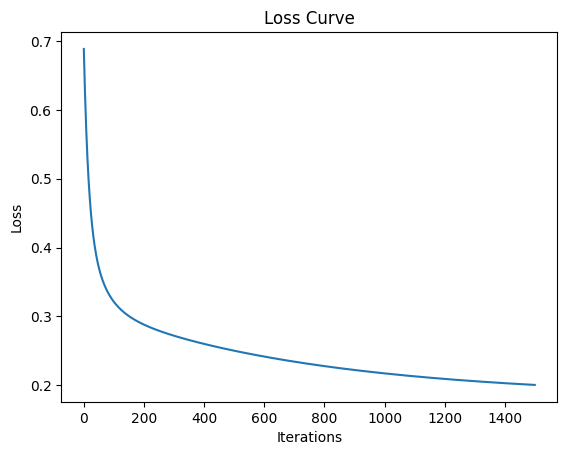

0.3212234665504774


In [31]:
#RUN THIS CELL AS IT IS
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)
print(losses[100])

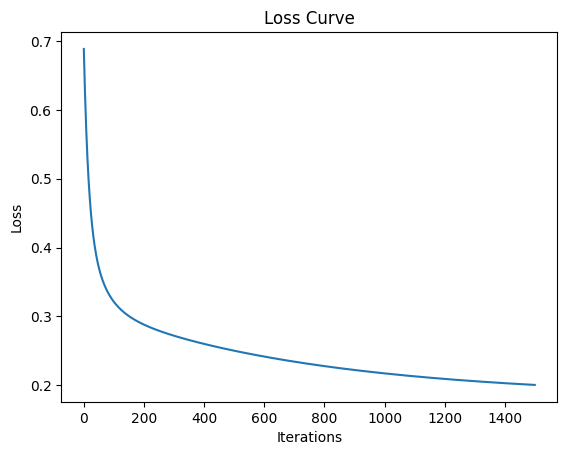

Sample Test passed 👍


In [32]:
#Sample test case
np.random.seed(1)
y_pred , y_true, losses , trained_w , trained_b = model(X, Y)
assert np.allclose(losses[100], 0.3212234664254295)
print('Sample Test passed', '\U0001F44D')

In [33]:
# hidden test cases. Do not modify

In [34]:
mean_squared_error(y_pred,y_true)

0.40109582287798423

The MSE of linear model is around 0.38 - 0.42 on a scale of 0 - 1.   
In the next section we will compare this score with the MSE obtained by using a Neural Network for the same task.

In [35]:
#Use this to check the accuracy of our model on Test set
df_test  = pd.read_csv('data/california_housing_test.csv')
scaler = MinMaxScaler()
scaler.fit(df)
test_scaled_data = scaler.transform(df_test)
test_scaled_df = pd.DataFrame(test_scaled_data,columns=df_test.columns) 

xtest = test_scaled_df.iloc[:,0:8]
ytest = test_scaled_df.iloc[:,8:9]
xtest  = xtest.values
ytest = ytest.values.reshape(-1,1)

ytest_pred = forward(xtest,trained_w,trained_b)
print(mean_squared_error(ytest,ytest_pred))

0.10642713467620957


## Visualization of work done so far [ungraded]

Visualisation of data is an important technique which can be used to see the results discretly and at the same time make suitable comparisions with the test cases to check how the model is working. Here we try to plot predicted values and actual values together in one graph with median_income as the independent variable. We also plot a correlation heat map to find out that our dependent variable depends on which factors majorly.



In [36]:
#making copies of data
x_new = X
y_pred_short = y_pred
y_true_short = y_true

#converting numpy arrays to pandas dataframe
df_new = pd.DataFrame(x_new)
df1 = pd.DataFrame(y_pred_short)
df1 = df1.rename(columns={'0': 'predicted_values'})
df2 = pd.DataFrame(y_true_short)
df2 = df2.rename(columns={'0': 'actual_values'})

In [37]:
#reducing dataset from 3000 rows to 100 rows for a clearer and better visualisation
rows_to_drop = [i for i in range(y_true_short.shape[0])]

df1.drop(df1.index[rows_to_drop], inplace = True)
df2.drop(df2.index[rows_to_drop], inplace = True)
df_new.drop(df_new.index[rows_to_drop], inplace = True)

you might be wondering why we are chosing median_salary in our above analysis.

In [38]:
df.corr() #calculating correlation values of all variables with each other

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925176,-0.106824,0.047466,0.071700,0.102994,0.058443,-0.015882,-0.045788
latitude,-0.925176,1.000000,0.010260,-0.038911,-0.069217,-0.112025,-0.073960,-0.079157,-0.143969
housing_median_age,-0.106824,0.010260,1.000000,-0.362034,-0.320873,-0.296285,-0.303109,-0.120161,0.104470
total_rooms,0.047466,-0.038911,-0.362034,1.000000,0.929778,0.856826,0.918234,0.199207,0.135298
total_bedrooms,0.071700,-0.069217,-0.320873,0.929778,1.000000,0.877377,0.979395,-0.007952,0.051111
population,0.102994,-0.112025,-0.296285,0.856826,0.877377,1.000000,0.907291,0.003884,-0.024234
households,0.058443,-0.073960,-0.303109,0.918234,0.979395,0.907291,1.000000,0.013535,0.066573
median_income,-0.015882,-0.079157,-0.120161,0.199207,-0.007952,0.003884,0.013535,1.000000,0.689109
median_house_value,-0.045788,-0.143969,0.104470,0.135298,0.051111,-0.024234,0.066573,0.689109,1.000000


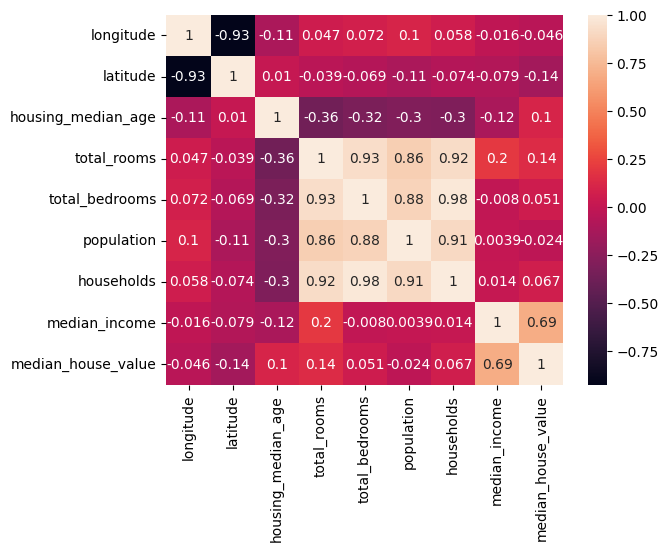

In [39]:
sns.heatmap(df.corr(), annot = True)
plt.show()

variables depend more on each other if the correlation values are less than -0.5 or greater than 0.5 . hence we see that median_income has the most effect on median_house_value (0.67) and so is the reason of plotting our predicted values and true values against it.

In [40]:
def distplot(var , n):
  plt.figure(figsize=(10,10))
  if (n % 2 == 0):
    sns.distplot(var, color='blue') #predicted values in blue colour
  else:
    sns.distplot(var,color='red')  #actual values in red colour


C:\Users\The_Death\AppData\Local\Temp\ipykernel_22604\3359160424.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var,color='red')  #actual values in red colour
C:\Users\The_Death\AppData\Local\Temp\ipykernel_22604\3359160424.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var, color='blu

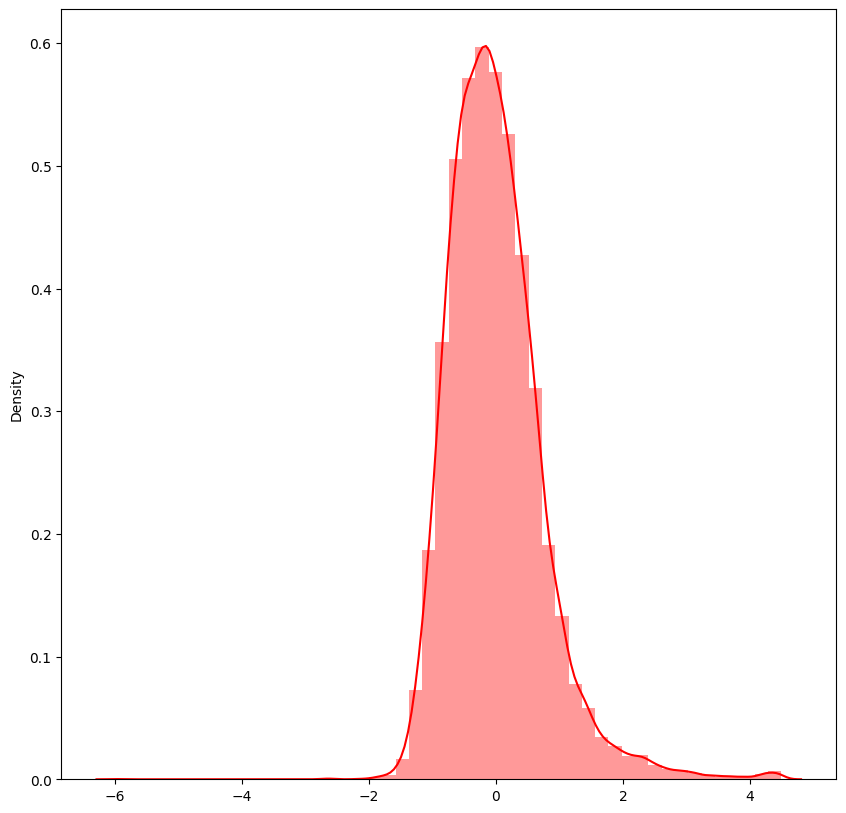

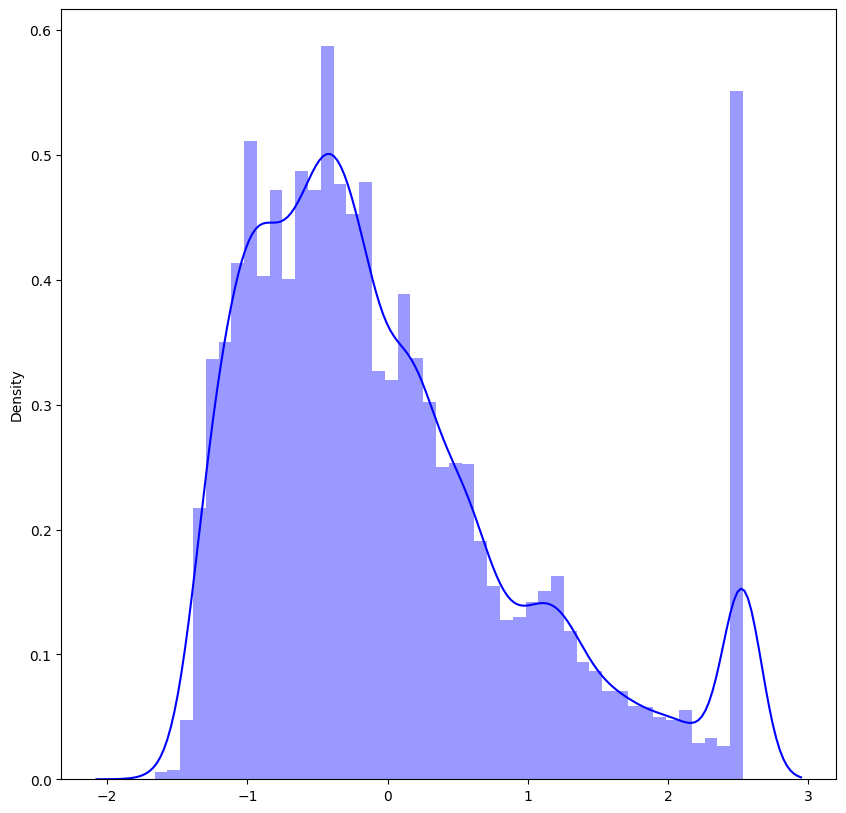

In [41]:
distplot(y_pred, 1)
distplot(y_true, 2)

distplot is basically a histogram which shows the density of the predicted values in comparision with the actual values, as we see most of our actual data lies between -2 and +2,
  so is the case with our predicted data and hence we can infer that our predicted values are close enough to the actual ones.

# Part II - Neural Networks

### Reading the data from CSV and storing in a dataframe

In [42]:
df = pd.read_csv('data/housing_data.csv')
assert df.shape == (20000,11)

### Dropping columns having irrelevant/NaN data in them

In [43]:
df.dropna(axis=1, inplace = True)
assert df.shape == (20000,9)

### Scaling the dataset

In [44]:
scaler= MinMaxScaler()
scaler.fit(df)
scaled_values = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


## An overview of our model
The image below shows the structure of the Neural Network we will be building in this assignment. The layers are labeled and the number of neurons for that particular layer are mentioned below them in parentheses.

![NN_4_layer_final.jpg]( 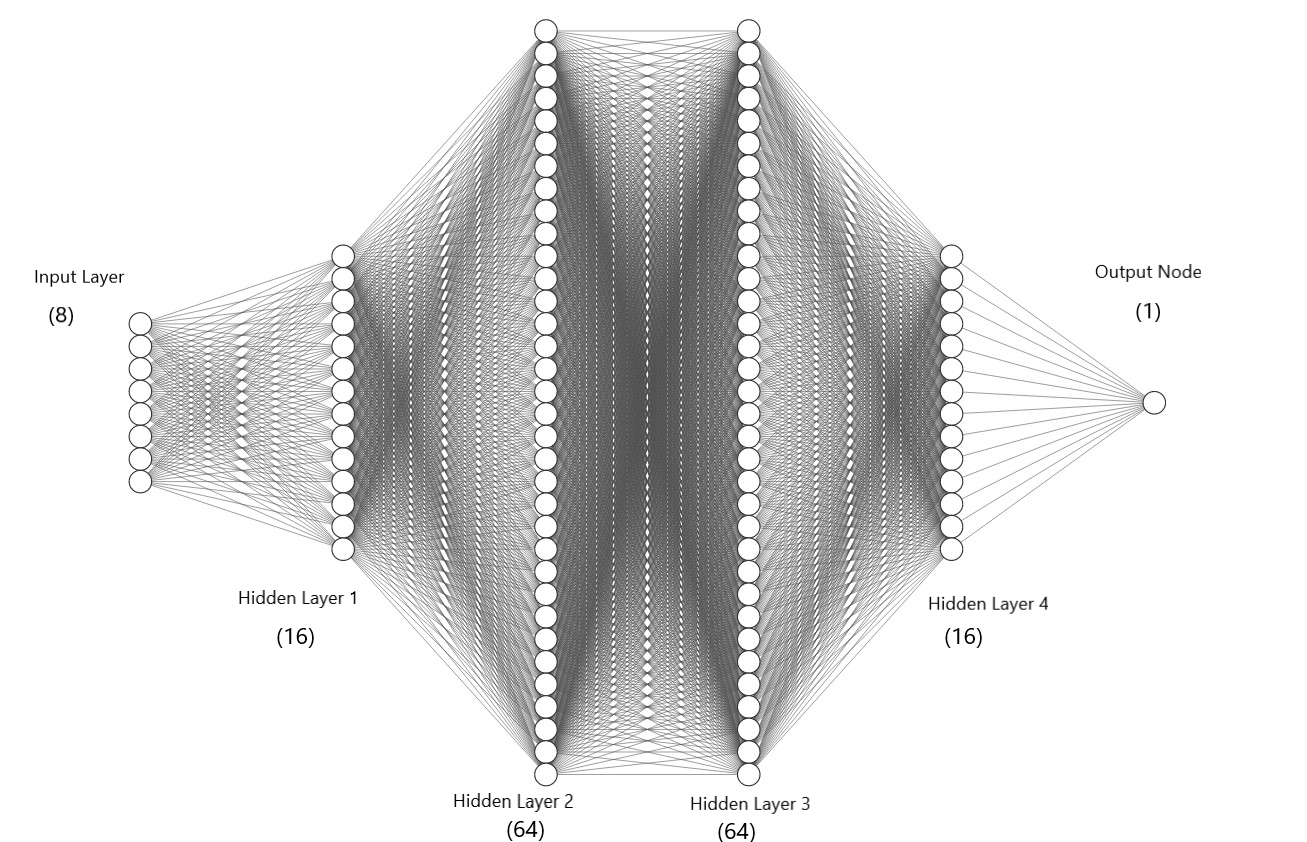)

> **Note**: The number of neurons in the diagram is different than the actual number given below them in parantheses for representation purposes. The number written is the actual number of neurons you will use for your architecture

## Architecture:

In the subsequent cells we will be implementing a **five-layer fully-connected neural network**. The network has an input dimension of I, four hidden layers dimensions of H1, H2, H3, and H4 and performs regression. Hence the output layer will consist of 1 neuron.

We train the network with Mean Squraed Error loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity in between the hidden layers and after the output layer.

In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - ReLU - fully connected layer -ReLU - fully connected layer -ReLU - fully connected layer -RelU

The outputs of the fifth fully-connected layer give us the result

## Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer.
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example.
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.



* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $
* Computation in a layer $h$ of the neural network can be described as follows:
  - Let $a^{[h-1]}$ be the activations of the previous layer or input data (if current layer is first hidden layer), of shape (size of previous layer, number of examples).
  - Let $ z^{[h]} $ be the pre-activation value. Then, $ z^{[h]} $ is computed as :
  $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
  where $ . $ denotes matrix multiplication.
  So, $z^{[h]}$ will be of shape (size of current layer, number of examples).
  - Let $a^{[h]}$ denote post activation value. It is computed as:
  $$ a^{[h]} = g^{[h]}(z^{[h]}) $$
  Note that shape of $a^{[h]}$ is same as that of $a^{[h]}$.
  
  - Also note that $A^{[0]}$ is nothing but $X$, the input data.

This function carries out computations of a single layer of the neural network:
 $$ z^{[h]} = W^{[h]}.a^{[h-1]}+b^{[h]}$$
 $$ a^{[h]} = g^{[h]}(z^{[h]}) $$

## Step 1: Initializing the parameters (weights and biases)



In the next function, weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and biases are initialized to zero

HINT : Initialise weights using numpy.random.rand which gives numbers between [0,1) and then convert all the numbers in this numpy array from [0,1) to [0,0.1) by dividing by a certain number

In [45]:
def Initialization(I, H1, H2, H3, H4, O):
    '''
    Weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and
    biases are initialized to zero. The dimensions of the
    parameters as as follows:-

          W1: First layer weights; has shape (H1, I)
          b1: First layer biases; has shape (H1, 1)
          W2: Second layer weights; has shape (H2, H1)
          b2: Second layer biases; has shape (H2, 1)
          W3: Third layer weights; has shape (H3, H2)
          b3: Third layer biases; has shape (H3, 1)
          W4: Fourth layer weights; has shape (H4,H3)
          b4: Fourth layer biases; has shape (H4, 1)
          W5: Fifth layer weights has shape (O,H4)
          b5: Fifth layer biases; has shape (O,1)

          Inputs:
          - I: The number of features of the input data.
          - H1: The number of neurons in the hidden layer - 1.
          - H2: The number of neurons in the hidden layer - 2.
          - H3: The number of neurons in the hidden layer - 3.
          - H4: The number of neurons in the hidden layer - 4.
          - O: The number of outputs(i.e. 1).

          Outputs:
          - paramters_final: List containing of parameters
          after they are initialized with appropriate values in this order:
          [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 ]
        '''

    W1 = np.random.rand(H1, I) / 10
    W2 = np.random.rand(H2, H1) / 10
    W3 = np.random.rand(H3, H2) / 10
    W4 = np.random.rand(H4, H3) / 10
    W5 = np.random.rand(O, H4) / 10
    
    b1 = np.zeros((H1, 1))
    b2 = np.zeros((H2, 1))
    b3 = np.zeros((H3, 1))
    b4 = np.zeros((H4, 1))
    b5 = np.zeros((O, 1))
    
    parameters_final = [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]
    
    return parameters_final

In [46]:
np.random.seed(2)
tln = Initialization(2, 3, 2, 1, 1, 1)
assert tln[0].shape == (3, 2)
assert tln[1].shape == (3, 1)
assert tln[2].shape == (2, 3)
assert tln[3].shape == (2, 1)
assert tln[4].shape == (1, 2)
assert tln[5].shape == (1, 1)
assert tln[6].shape == (1, 1)
assert tln[7].shape == (1, 1)
assert tln[8].shape == (1, 1)
assert tln[9].shape == (1, 1)
assert np.allclose(tln[0][0][0],0.04359949021420038)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [47]:
# hidden test cases. Do not modify

> Similarly add 2 cells after every function so that after every cell containg a FUNCTION, there are 2 cells after that containing test cases for that particular function

## Step 2: Implement the activation function

## ReLU (Rectified Linear Unit) Activation Function

ReLU is one of the most widely used activation functions in deep learning, particularly for hidden layers. It outputs the input directly if positive, otherwise, it outputs zero.

### Formula:
$$\text{ReLU}(z) = \max(0, z)$$

### Derivative:
$$\text{ReLU}'(z) = \begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}$$

### Shapes:
- Input Z: Shape (n, m) where n is the number of neurons in the current layer and m is the batch size
- Output A: Same shape as Z: (n, m)
- Cache: Stores Z with shape (n, m) for backpropagation

In [48]:
def relu(Z):
    A = np.maximum(0, Z)
    return A
    raise NotImplementedError()

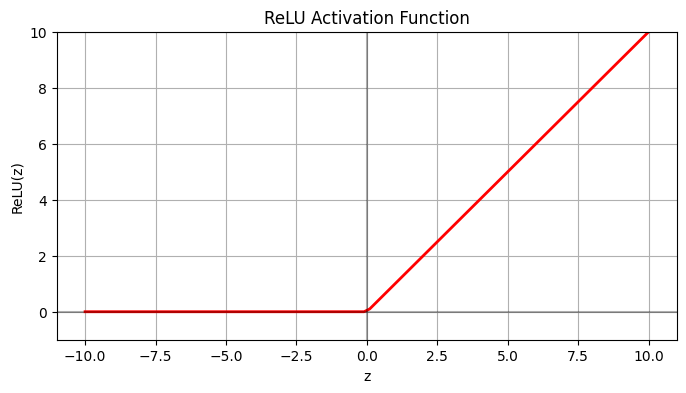

In [49]:
z = np.linspace(-10, 10, 100)
relu_z = np.maximum(0, z)

plt.figure(figsize=(8, 4))
plt.plot(z, relu_z, 'r-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.ylim(-1, 10)
plt.show()

In [50]:
# sample test case
assert np.allclose(relu(np.array([[3,-4]])), np.array([[3,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [51]:
# hidden test cases. Do not modify

## Softmax Activation function
The softmax function converts a vector of real numbers into a probability distribution. It's commonly used in the output layer for multi-class classification problems.

### Formula:
$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

Where K is the number of classes.

### Derivative:
The derivative of softmax is more complex and is usually combined with cross-entropy loss for backpropagation.

### Shapes:
- Input Z: Shape (n_classes, m) where n_classes is the number of output classes and m is the batch size
- Output A: Same shape as Z: (n_classes, m), representing probability distributions over classes
- Cache: Stores Z with shape (n_classes, m) for backpropagation

In [52]:
def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    return A

def softmax_backward(dA):
    return dA

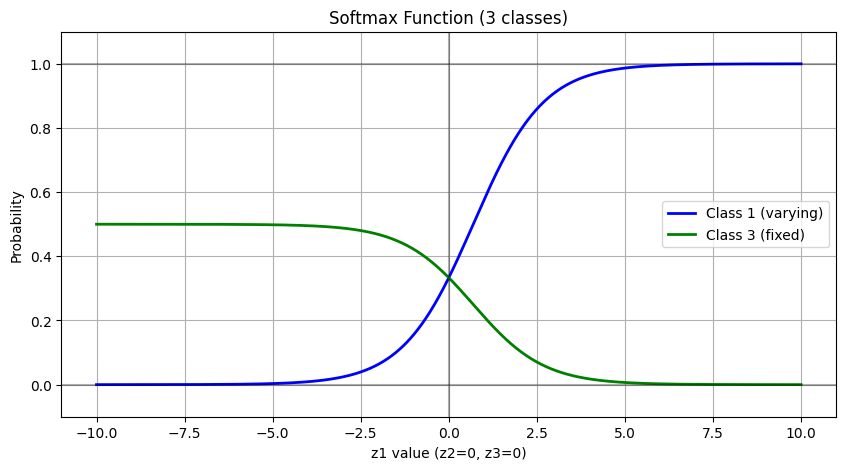

In [53]:
# Set up the values for three classes
z = np.linspace(-10, 10, 1000)
z1 = z  # Varying value
z2 = np.zeros_like(z)  # Fixed value
z3 = np.zeros_like(z)  # Fixed value

# Calculate softmax for all three classes
exp_z1 = np.exp(z1)
exp_z2 = np.exp(z2)
exp_z3 = np.exp(z3)
sum_exp = exp_z1 + exp_z2 + exp_z3

softmax_z1 = exp_z1 / sum_exp
softmax_z2 = exp_z2 / sum_exp
softmax_z3 = exp_z3 / sum_exp

plt.figure(figsize=(10, 5))
plt.plot(z, softmax_z1, 'b-', linewidth=2, label='Class 1 (varying)')
plt.plot(z, softmax_z3, 'g-', linewidth=2, label='Class 3 (fixed)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z1 value (z2=0, z3=0)')
plt.ylabel('Probability')
plt.title('Softmax Function (3 classes)')
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

## Step 3: Forward propagation

In [54]:
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (8, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: List containing the parameters of the model

    Outputs:
    - y_out : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4,z5,a5]
    '''
    
    l = []
    
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = params
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)
    l.append(Z1)
    l.append(A1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.maximum(0, Z2)  
    l.append(Z2)
    l.append(A2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = np.maximum(0, Z3)  
    l.append(Z3)
    l.append(A3)
    
    Z4 = np.dot(W4, A3) + b4
    A4 = np.maximum(0, Z4) 
    l.append(Z4)
    l.append(A4)
    
    Z5 = np.dot(W5, A4) + b5
    A5 = np.maximum(0, Z5)
    l.append(Z5)
    l.append(A5)
    
    # The final output
    y_out = A5
    
    return y_out, l

In [55]:
np.random.seed(2)
para = Initialization(6, 3, 2, 2, 1, 1)
y_forward,l = feed_forward(np.random.rand(6,10), para)
assert y_forward.shape == (1, 10)
assert np.allclose(y_forward[0][5], 1.2063488250870311e-06)
assert l[0].shape==(3,10)
assert l[2].shape==(2,10)
assert l[6].shape==(1,10)
assert np.allclose(l[0][0][1], 0.11645815161695633)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [56]:
# hidden test cases. Do not modify

## Step 4: Calculating the loss

(*Loss*) $L = \frac{1}{2m} * \sum({yd -y\_pred})^{2} $ <br>

where $yd$ is the desired value of y i.e. the one present in our set whereas $y\_pred$ is the value of target we have predicted, and m is the no of examples. <br>


In [57]:
def loss_compute(y_pred, yd):
    '''
    Inputs:
    - y_pred: numpy array containing predicted values of target
    - yd: numpy array containing desired values of y given in the
    dataset
    Outputs:
    - loss: Calculate and return the loss using the above formula
    '''
    m = y_pred.shape[1]
    
    squared_diff = np.square(yd - y_pred)
    
    sum_squared_diff = np.sum(squared_diff)
    
    loss = (1 / (2 * m)) * sum_squared_diff
    
    return loss

In [58]:
# TEST CASE 1

sample_loss = loss_compute(np.array([[1,1]]) , np.array([[1,0]]))
assert np.allclose(sample_loss,0.25)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [59]:
# hidden test cases. Do not modify

## Step 5: Regularization
It is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It improves the generalization capability of a model, i.e. its performance on unseen test examples.

**Step 5: A function to add regularization by sum of squares so as to prevent overfitting the data**




$$J_{regularized} =  \underbrace{\frac{1}{2m}\sum_{i=1}^{m} (y^{(i)}-a^{[L](i)})^{2}}_{\text{Mean Squared Cost}} +\underbrace{\frac{1}{m}\frac{\lambda}{2}\sum_{l}\sum_{k}\sum_{j}W_{k.j}^{[l]2}}_{\text{L2 regularization cost}}$$

where (k, j) refer to the shape of that pariculat W (weight matrix) and $ l $ refers to the layer number.


You have already implemented Mean Squared Cost function in the last cell. Now in the function below, you'll implement the L2 regularization cost using the formula given

HINT : Try to see what the two inner summations $ \sum_{k}\sum_{j} $ of a particular weight matrix(or any random matrix) looks like. The code for the double summation summed over all layers of our Network, is much much easier than the formula

In [60]:
def regularization_L2(lmbda, W1, W2, W3, W4, W5, m):
    '''
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3, W4, W5: numpy arrays containing weights of the model
    - m: no of examples

    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    '''
    
    W1_sum_squares = np.sum(np.square(W1))
    W2_sum_squares = np.sum(np.square(W2))
    W3_sum_squares = np.sum(np.square(W3))
    W4_sum_squares = np.sum(np.square(W4))
    W5_sum_squares = np.sum(np.square(W5))
    
    total_sum_squares = W1_sum_squares + W2_sum_squares + W3_sum_squares + W4_sum_squares + W5_sum_squares
    
    total_reg_loss = (1/m) * (lmbda/2) * total_sum_squares
    
    return total_reg_loss

In [61]:
# TEST CASE 1
assert np.allclose(regularization_L2(1,np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),np.array([[1]]),1),2.5)
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [62]:
# hidden test cases. Do not modify

## Step 6: Making helper functions for backpropagation
Our next step will be to create some helper functions before starting
backpropagation


### Helper Function 1

We would need derivatives of  the **ReLU** function.

Hint: ReLU function derivative can be calculated in one step using lambda functions. For more information, refer to this link: https://www.w3schools.com/python/python_lambda.asp


Note the following rules for the activation function:
$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} =   \left\{
\begin{array}{ll}
      1 & z>=0 \\
      0& z < 0 \\
\end{array}
\right. $$

Note:
The function relu(z) can be written as A(z) where A stands for activation function.

$$ \frac{\partial \mathcal{(relu(z))} }{\partial z} = \frac{\partial \mathcal{A(z)} }{\partial z} $$

In [63]:
def relu_backward(Z):
    """
    Implement the backward propagation for a single RELU unit.
    
    Arguments:
    Z -- input array, which can be interpreted as either the pre-activation values 
         or the gradient from the next layer
    
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    dZ = np.ones_like(Z)
    
    dZ[Z <= 0] = 0
    
    return dZ

In [64]:
# TEST CASE
assert np.allclose(relu_backward(np.array([[2,-3]])), np.array([[1,0]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [65]:
# hidden test cases. Do not modify

### Helper Function 2

Here, We would be creating a helper function to calculate and return the values of dz, dW, and db for each layer. Refer to the formulae provided below to get a clear understanding of it's implementation.

Note that the value of **dz depends on the derivatives of activation functions** used for that layer and the functions that we have created above may come in handy.

This function computes  $dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial Z^{[h]}}$, given  $dA^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}}$ and $Z^{[h]}$as inputs. It is based on the following chain rule from calculus:


$$ dZ^{[h]} = \frac{\partial \mathcal{L} }{\partial A^{[h]}} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$

$$ dZ^{[h]} = dA^{[h]} * \frac{\partial \mathcal{A^{[h]}} }{\partial Z^{[h]}}$$



  - $ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} = \frac{1}{m} dZ^{[h]} A^{[h-1] T}$
  - $ db^{[h]} = \frac{\partial \mathcal{L} }{\partial b^{[h]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[h](i)}$
  - $ dW_{total}^{[h]} = dW^{[h]} + dW_{reg}^{[h]} $

where $ dW_{reg}^{[h]} = \frac{1}{m} * lambda * weight^{[h]} $

The reason we are calculating $ dW^{[h]} $ and $ db^{[h]} $ is they are the ***learnable parameters*** of our model.

$ dW^{[h]} = \frac{\partial \mathcal{L} }{\partial W^{[h]}} $ signifies the contribution of $ W^{[h]} $ to our loss function $ \mathcal{L} $.
This gradients $ dW^{[h]} $ and $ db^{[h]} $ will help us perform Gradient Descent on our parameters $ W^{[h]} $ and $ b^{[h]} $

If you want to understand more about derivation of above formulas or just about backpropogation in general, look through these slides once : https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec06.pdf
<br />
<br />

 **NOTE**
: Try to use vectorization as far as possible instead of loops as it would be simpler for you to debug

In [66]:
def back_prop_linear(da_layer, z_layer, input, act_fxn, m, lmbda, weight):
    """
    Compute the gradients for a single layer
    
    Inputs:
    - da_layer: derivative of variable 'a' of that layer
    - z_layer: numpy array of 'z' values for that layer
    - input: input value of that layer
    - act_fxn: string containing the name of the activation function
    - m: number of datapoints
    - lmbda: regularization parameter
    - weight: weights of that particular layer
    
    Outputs:
    - dz: returns the derivative of linear function variable
    - dW: returns the change in weights for that layer
    - db: returns the change in bias for that layer
    """
    if act_fxn == 'relu':
        dz = da_layer * relu_backward(z_layer)
    elif act_fxn == 'softmax':
        dz = softmax_backward(da_layer)
    else:
        raise ValueError(f"Activation function {act_fxn} not supported")
    
    dw = (np.dot(dz, input.T) + lmbda * weight) / m
    
    db = np.sum(dz, axis=1, keepdims=True) / m
    
    return dz, dw, db

In [67]:
# TEST CASE
m=1
# previous layer has 2 neurons and current layer has 2 neurons
z_h=np.array([[1],[2]])
da_h=np.array([[0.1],[0.2]])
inp=np.array([[1],[0]])
weights=np.array([[1,1],[2,0]])
dz, dW, db = back_prop_linear(da_h, z_h, inp, 'relu' , m, 1, weights)
assert np.allclose(dz,np.array([[0.1],[0.2]]))
assert np.allclose(dW,np.array([[1.1,1],[2.2,0]]))
assert np.allclose(db,np.array([[0.1],[0.2]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [68]:
# hidden test cases. Do not modify

### Helper Function 3

We would need a helper function to calculate the derivatives of activation function variables

We will calculate dA for the last layer separately in the subsequent function.

For all other layers, we proceed as follows :



Using this formula

  - $ Z^{[h]} = W^{[h]}.A^{[h-1]}+b^{[h]}$


  - $ dA^{[h-1]} = \frac{\partial \mathcal{L} }{\partial A^{[h-1]}} = W^{[h] T} dZ^{[h]}$

In [69]:
def back_prop_actf(W_plusone, dz_plusone):
    '''
    Inputs:
    - W_plusone: Weights of the next layer
    - dz_plusone: Derivative of the linear function of the next
    layer

    Outputs:
    - act_dtive: returns the derivative of activation function variable

    NOTE : This function can be used to find dA for EVERY layer EXCEPT the last layer
    '''
    return np.dot(W_plusone.T, dz_plusone)
    raise NotImplementedError()

In [70]:
der=back_prop_actf(np.array([[1],[2]]), np.array([[2],[3]]))
assert np.allclose(der,np.array([[8]]))
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [71]:
# hidden test cases. Do not modify

## Combining all the helper functions for Backpropogation

Now we will be creating the main function for backpropagation where we combine all the helper functions to update the weights. We will first compute errors at the last layer and backpropagate them through the network to get the desired $dW$ and $db$ for each layer.

We would using a single function to return these values as the formula remains the same.

To backpropagate through this network, we know that the output is, $ ypred = A^{[H]} = ReLU(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula:
$$ dA^{[H]} = -({yd -A^{[H]}})$$

**Remember: This is only for the last layer, use the above helper function for the other layers.**

**HINT:** Use the back_prop_linear function to obtain $dz,dW,db$ at each layer.

So to sum up all the Backpropogation helper functions and combine them in the next function :

Calculate $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$ for the **last layer** using the forumula:
$$ dA^{[H]} = -({yd -A^{[H]}})$$

After that , calculate  $ dW^{[H]}$ ,  $db^{[H]}$ and  $ dz^{[H]} $ using back_prop_linear function.

HINT : You already have $ dA^{[5]} $ using the formula given above. From that you can calculate $ dW^{[5]}$ ,  $db^{[5]}$ and  $ dz^{[5]} $ using back_prop_linear function

Now use back_prop_actf to find $ dA^{[4]} $ followed by back_prop_linear to find $ dW^{[4]}$ ,  $db^{[4]}$ and  $ dz^{[4]} $

Continue this process till you have the gradients for all 5 Weights and Biases

In [72]:
def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    '''
    Inputs:
    - X: Input features - shape (no of features, no of examples)
    - yd: y desired values(labels given in dataset)
    - l: list containing values of 'z' and 'a' of each layer
    - parameters: list containing weights and biases of each layer
    - lmbda: regularization parameter

    Outputs:
    - grad: dictionary containing the change in the values of weights
    and biases with keys 'dW1','dW2','dW3','dW4','dW5','db1','db2','db3','db4','db5'
    '''
    
    m = X.shape[1]
    
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = parameters
    
    # Format of l: [z1, a1, z2, a2, z3, a3, z4, a4, z5, a5]
    z1, a1, z2, a2, z3, a3, z4, a4, z5, a5 = l
    
    grads = {}
    
    dA5 = -(yd - y_pred)
    
    #Layer 5
    dz5, dW5, db5 = back_prop_linear(dA5, z5, a4, 'relu', m, lmbda, W5)
    
    #Layer 4
    dA4 = np.dot(W5.T, dz5)
    dz4, dW4, db4 = back_prop_linear(dA4, z4, a3, 'relu', m, lmbda, W4)
    
    # Layer 3
    dA3 = np.dot(W4.T, dz4)
    dz3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'relu', m, lmbda, W3)
    
    # Layer 2
    dA2 = np.dot(W3.T, dz3)
    dz2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
    
    #Layer 1
    dA1 = np.dot(W2.T, dz2)
    dz1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
    
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2
    grads['dW3'] = dW3
    grads['db3'] = db3
    grads['dW4'] = dW4
    grads['db4'] = db4
    grads['dW5'] = dW5
    grads['db5'] = db5
    
    return grads

In [73]:
grads_check = {'dW1' : np.array([0.00477814 ,0.00262214]),
               'dW2' : np.array([0.00338872 ,0.00096401]),
               'dW3' : np.array([0.00384367 ,0.00093328 ,0.00427237]),
               'dW4' : np.array([0.00477098 ,0.00216877 ,0.00474162]),
               'dW5' : np.array([0.00010706 ,0.00272906]),
               'db1': np.array([-5.70127772e-05]),
               'db2': np.array([-0.00048472]),
               'db3': np.array([-0.00272006]),
               'db4': np.array([-0.00374705]),
               'db5': np.array([-0.4999496])
              }
np.random.seed(4)
parameters = Initialization(2, 2, 3, 3, 2, 1)
X = np.array([[1,2],[2,3]])
y_pred, l = feed_forward(X, parameters)
sample_grads = Backpropagation1(X, np.array([[1,0]]), l, y_pred, parameters, lmbda = 0.1)
for key in grads_check.keys():
    assert np.allclose(grads_check[key],sample_grads[key][0])
print('Sample Test passed', '\U0001F44D')

Sample Test passed 👍


In [74]:
# hidden test cases. Do not modify

The weights are now updated in each iteration via the learning rules:

$$ W^{[h]} = W^{[h]} - \alpha \text{ } dW^{[h]} $$
$$ b^{[h]} = b^{[h]} - \alpha \text{ } db^{[h]} $$

where h takes value from 1 to 5 for our 4 hidden layers and 1 output node
<br />
<br />

- We are done with most of the code now, yet there is the most important function left to be created - where we will be training our model.

- Refer to the overview again before writing a code for this function.

- You will have to call the above functions repeatedly and update the weights and bias with each iteration

- The values of number of iterations(num_iters), learning rate(eta) and regularization parameter(lmbda) **have been already tuned**. If you wish to experiment on these variables for a better understanding, you are free to do so. The final result, however, will be evaluated using the values given.

## Training your model

For training the model you need to do the following in the next function:
1) You are provided with *X, yd, parameters* as arguments. *X* and *yd* are scaled so **DO NOT** scale them again inside this *training* function

2) Store W1 to W5 and b1 to b5 (weights and biases) in **seperate variables** by accessing the *parameters* argument

3) Initialise an empty list to which you will append the loss of every iteration

4) Now for N number of iterations:
     - compute y_predicted and a5 using feedforward
     
     - compute loss using y_predicted and yd - say loss_1
     
     - calculate regularization loss say loss_2
     
     - total loss = loss_1 + loss_2
     
     - append this to the list you created in step 3
     
     - calculate gradients
     
     - update W1 to W5 and b1 to b5 by using the gradients calculated above
     
     - in the next iteration , when using feed forward use these updated W1 to W5 and b1 to  b5
     
     - And then follow this for N iterations
     
5) Return the history of loss (that list you created in step 3 populated with loss of every iteration) and the trained *W* and *b*

In [75]:
def training(X, yd, parameters, eta=0.05, num_iters=3000, lmbda=0.1):
    '''
    Inputs:
    - X: Input features - shape (no of features, no of examples)
    - yd: y desired values of shape (1,no. of examples)
    - parameters - The initial parameters of the model (W and b)
    - eta: learning rate
    - num_iters: number of iterations
    - lmbda: regularization parameter

    Outputs:
    - losses: list of loss at the start of each iteration
    - parameters: the final TRAINED parameters
    Return in the format : losses,[W1,b1,W2,b2,W3,b3,W4,b4,W5,b5]
    '''
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = parameters
    
    m = X.shape[1]
    
    losses = []
    
    for i in range(num_iters):
        y_pred, l = feed_forward(X, [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5])
        
        loss_1 = loss_compute(y_pred, yd)
        
        loss_2 = regularization_L2(lmbda, W1, W2, W3, W4, W5, m)
        
        total_loss = loss_1 + loss_2
        
        losses.append(total_loss)
        
        grads = Backpropagation1(X, yd, l, y_pred, [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5], lmbda)
        
        W1 = W1 - eta * grads['dW1']
        b1 = b1 - eta * grads['db1']
        W2 = W2 - eta * grads['dW2']
        b2 = b2 - eta * grads['db2']
        W3 = W3 - eta * grads['dW3']
        b3 = b3 - eta * grads['db3']
        W4 = W4 - eta * grads['dW4']
        b4 = b4 - eta * grads['db4']
        W5 = W5 - eta * grads['dW5']
        b5 = b5 - eta * grads['db5']
    
    return losses, [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5]

In [76]:
#See the starting of Neural Network section where we decclared the scaled_df dataframe
X_df = scaled_df.iloc[:,0:8] # The first 8 columns are our X variables
Y_df = scaled_df.iloc[:,8:9] # The 9th column or 'median_house_value' is what we are trying to predict
x_train  = X_df.values.T
y_actual = Y_df.values.reshape(1,-1)

In [77]:
#Sample test case
np.random.seed(2)
parameters = Initialization(8,16,64,64,16,1)#ALL ACTIVATION RELU
losses, parameters_final = training(x_train, y_actual,parameters, eta = 0.05, num_iters=300, lmbda = 0.1)
assert np.allclose(losses[200],0.018760000609514545)
print('Sample Test passed', '\U0001F44D')
#You can change num_iters to 10000, will take around 10-15 minutes to train
'''
You can also play around with the model hyper-parameters to see if you can improve on our results
Try changing:
    - The model architecture (number of layers, number of neurons in each layer)
    - The batch size
    - The learning rate

Make sure you set the parameters to their original values before submitting the assignment
'''

Sample Test passed 👍


'\nYou can also play around with the model hyper-parameters to see if you can improve on our results\nTry changing:\n    - The model architecture (number of layers, number of neurons in each layer)\n    - The batch size\n    - The learning rate\n\nMake sure you set the parameters to their original values before submitting the assignment\n'

In [78]:
# hidden test cases. Do not modify

To self-evaluate the result obtained, plot the loss function with respect to the number of iterations and rethink the algorithm if your loss function is not reaching a minimum value.

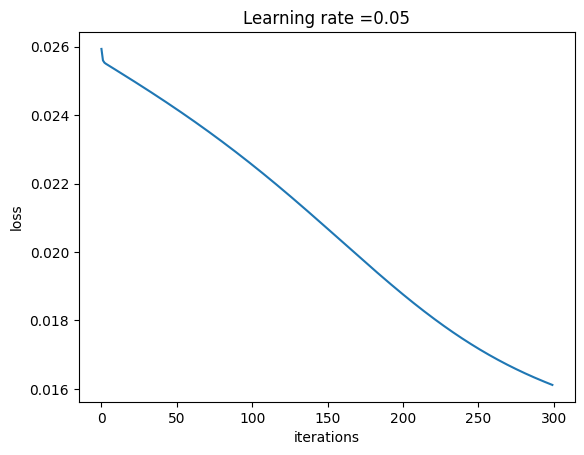

In [79]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.05))
plt.show()

> If everything goes well, the above loss plot should be reaching 0.012 - 0.010 after around 3k-4k epochs

In [80]:
#Let's see how well our model works on TEST data
df_test  = pd.read_csv('data/california_housing_test.csv')
scaler = MinMaxScaler()
scaler.fit(df)
test_scaled_data = scaler.transform(df_test)
test_scaled_df = pd.DataFrame(test_scaled_data,columns=df_test.columns) #make sure column names are retained

xtest = test_scaled_df.iloc[:,0:8]
ytest = test_scaled_df.iloc[:,8:9]
xtest  = xtest.values.T
ytest = ytest.values.reshape(1,-1)

ytest_pred = feed_forward(xtest,parameters_final)[0]
print(mean_squared_error(ytest,ytest_pred))

0.031460560985035003


# 3 Train model on mnist dataset

In [81]:
def load_mnist():
    """
    Load the MNIST dataset
    """
    print("Loading MNIST dataset...")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
    
    # Convert to numpy array
    X = X.to_numpy().astype('float32')
    y = y.to_numpy().astype('int32')
    
    # Normalize the data
    X = X / 255.0
    
    return X, y

def preprocess_data(X, y, test_size=0.2, random_state=42):
    """
    Split and preprocess the data
    """
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

def one_hot_encode(y, num_classes=10):
    """
    One-hot encode the target values
    """
    y_one_hot = np.zeros((y.shape[0], num_classes))
    y_one_hot[np.arange(y.shape[0]), y.astype(int)] = 1
    
    return y_one_hot

In [82]:
def create_mini_batches(X, y, batch_size):
    """
    Create mini-batches from the dataset
    """
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-10]  # Features
        Y_mini = mini_batch[:, -10:]   # Labels
        mini_batches.append((X_mini, Y_mini))
    
    # Handle the end case (last mini-batch < batch_size)
    if data.shape[0] % batch_size != 0:
        mini_batch = data[n_minibatches * batch_size:, :]
        X_mini = mini_batch[:, :-10]
        Y_mini = mini_batch[:, -10:]
        mini_batches.append((X_mini, Y_mini))
    
    return mini_batches

In [83]:
def Initialization(I, H1, H2, O):
    """
    Initialize parameters for a neural network with 2 hidden layers
    
    Arguments:
    I -- size of the input layer
    H1 -- size of the first hidden layer
    H2 -- size of the second hidden layer
    O -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing the parameters:
                    W1 -- weight matrix of shape (H1, I)
                    b1 -- bias vector of shape (H1, 1)
                    W2 -- weight matrix of shape (H2, H1)
                    b2 -- bias vector of shape (H2, 1)
                    W3 -- weight matrix of shape (O, H2)
                    b3 -- bias vector of shape (O, 1)
    """
    np.random.seed(42)
    
    # He initialization for better training with ReLU
    W1 = np.random.randn(H1, I) * np.sqrt(2. / I)
    b1 = np.zeros((H1, 1))
    
    W2 = np.random.randn(H2, H1) * np.sqrt(2. / H1)
    b2 = np.zeros((H2, 1))
    
    W3 = np.random.randn(O, H2) * np.sqrt(2. / H2)
    b3 = np.zeros((O, 1))
    
    parameters = [W1, b1, W2, b2, W3, b3]
    
    return parameters

In [84]:
def feed_forward(X, params):
    """
    Using the formulae given below, apply forward propagation for each layer
    
    z = wX + b
    a = g(z)  {g being the non linear function i.e the activation function}
    
    Inputs:
    - X : Input data of shape (num_features, num_samples)
    - params: List containing the parameters of the model [W1, b1, W2, b2, W3, b3]
    
    Outputs:
    - y_out : predicted values
    - l : List containing the activation and linear outputs of each layer in the following fashion
          [z1,a1,z2,a2,z3,a3]
    """
    
    l = []
    
    W1, b1, W2, b2, W3, b3 = params
    
    # First hidden layer with ReLU
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    l.append(Z1)
    l.append(A1)
    
    # Second hidden layer with ReLU
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    l.append(Z2)
    l.append(A2)
    
    # Output layer with softmax
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    l.append(Z3)
    l.append(A3)
    
    # The final output
    y_out = A3
    
    return y_out, l

In [85]:
def loss_compute(y_pred, yd):
    """
    Compute cross-entropy loss for classification
    
    Inputs:
    - y_pred: numpy array containing predicted probabilities
    - yd: numpy array containing desired values (one-hot encoded)
    
    Outputs:
    - loss: Calculate and return the cross-entropy loss
    """
    m = y_pred.shape[1]
    
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    loss = -np.sum(yd * np.log(y_pred)) / m
    
    return loss

In [86]:
def regularization_L2(lmbda, W1, W2, W3, m):
    """
    Compute L2 regularization term
    
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3: numpy arrays containing weights of the model
    - m: no of examples
    
    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    """
    
    W1_sum_squares = np.sum(np.square(W1))
    W2_sum_squares = np.sum(np.square(W2))
    W3_sum_squares = np.sum(np.square(W3))
    
    total_sum_squares = W1_sum_squares + W2_sum_squares + W3_sum_squares
    
    total_reg_loss = (lmbda / (2 * m)) * total_sum_squares
    
    return total_reg_loss

In [87]:
def Backpropagation1(X, yd, l, y_pred, parameters, lmbda):
    """
    Compute gradients for backpropagation
    
    Inputs:
    - X: Input features - shape (no of features, no of examples)
    - yd: y desired values(labels given in dataset) - one-hot encoded
    - l: list containing values of 'z' and 'a' of each layer
    - parameters: list containing weights and biases of each layer
    - lmbda: regularization parameter
    
    Outputs:
    - grad: dictionary containing the change in the values of weights
      and biases with keys 'dW1','dW2','dW3','db1','db2','db3'
    """
    
    m = X.shape[1]
    
    W1, b1, W2, b2, W3, b3 = parameters
    
    z1, a1, z2, a2, z3, a3 = l
    
    grads = {}
    
    # Output layer (softmax)
    dA3 = y_pred - yd
    dz3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'softmax', m, lmbda, W3)
    
    # Second hidden layer (ReLU)
    dA2 = back_prop_actf(W3, dz3)
    dz2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
    
    # First hidden layer (ReLU)
    dA1 = back_prop_actf(W2, dz2)
    dz1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
    
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2
    grads['dW3'] = dW3
    grads['db3'] = db3
    
    return grads

In [88]:
def predict(X, parameters):
    """
    Make predictions using the trained model
    
    Arguments:
    X -- input data (n_features, n_samples)
    parameters -- trained parameters [W1, b1, W2, b2, W3, b3]
    
    Returns:
    predictions -- predicted classes for each sample
    """
    y_pred, _ = feed_forward(X, parameters)
    predictions = np.argmax(y_pred, axis=0)
    return predictions

In [89]:
def visualize_training(losses, train_accuracies, test_accuracies=None):
    """
    Visualize the training progress with both training and test metrics
    """
    plt.figure(figsize=(15, 10))
    
    # Plot cost
    plt.subplot(2, 1, 1)
    plt.plot(losses)
    plt.title('Cost over iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot accuracies
    plt.subplot(2, 1, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='blue')
    if test_accuracies is not None:
        plt.plot(test_accuracies, label='Test Accuracy', color='red')
    plt.axhline(y=95, color='green', linestyle='--', label='Target (95%)')
    plt.title('Accuracy over iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def visualize_predictions(X_test, y_test, parameters, num_examples=10):
    """
    Visualize some test examples and their predictions
    """
    if len(y_test.shape) > 1: 
        y_true = np.argmax(y_test, axis=0)
    else:
        y_true = y_test
    
    y_pred = predict(X_test, parameters)
    
    indices = np.random.choice(range(X_test.shape[1]), num_examples, replace=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, idx in enumerate(indices):
        img = X_test[:, idx].reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        correct = y_true[idx] == y_pred[idx]
        color = 'green' if correct else 'red'
        title = f"Pred: {y_pred[idx]}, True: {y_true[idx]}"
        axes[i].set_title(title, color=color)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [90]:
def visualize_predictions(X_test, y_test, parameters, num_examples=10):
    """
    Visualize some test examples and their predictions
    """
    if len(y_test.shape) > 1: 
        y_true = np.argmax(y_test, axis=0)
    else:
        y_true = y_test
    
    y_pred = predict(X_test, parameters)
    
    indices = np.random.choice(range(X_test.shape[1]), num_examples, replace=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i, idx in enumerate(indices):
        img = X_test[:, idx].reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        correct = y_true[idx] == y_pred[idx]
        color = 'green' if correct else 'red'
        title = f"Pred: {y_pred[idx]}, True: {y_true[idx]}"
        axes[i].set_title(title, color=color)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plot the confusion matrix to evaluate the classifier
    
    Arguments:
    y_true -- true labels
    y_pred -- predicted labels
    classes -- list of class names
    """
    
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, 
                yticklabels=classes)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    accuracy = np.trace(cm) / np.sum(cm)
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    
    print("\nPer-class metrics:")
    print("------------------")
    
    for i in range(len(classes)):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        print(f"Class {i}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    
    plt.tight_layout()
    plt.show()
    
    return cm

Loading MNIST dataset...
X_train shape: (784, 56000)
y_train shape: (10, 56000)
X_test shape: (784, 14000)
y_test shape: (10, 14000)
Training model...


Training Progress:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0/50 - Loss: 0.4627 - Train Acc: 89.28% - Test Acc: 93.87%
Epoch 10/50 - Loss: 0.1222 - Train Acc: 98.98% - Test Acc: 97.41%
Epoch 20/50 - Loss: 0.0928 - Train Acc: 99.83% - Test Acc: 97.69%
Epoch 30/50 - Loss: 0.0802 - Train Acc: 99.97% - Test Acc: 97.71%
Epoch 40/50 - Loss: 0.0724 - Train Acc: 99.99% - Test Acc: 97.75%
Epoch 49/50 - Loss: 0.0668 - Train Acc: 100.00% - Test Acc: 97.76%
Calculating final accuracy...
Final Training Accuracy: 99.99%
Final Test Accuracy: 97.76%
Training time: 473.35 seconds


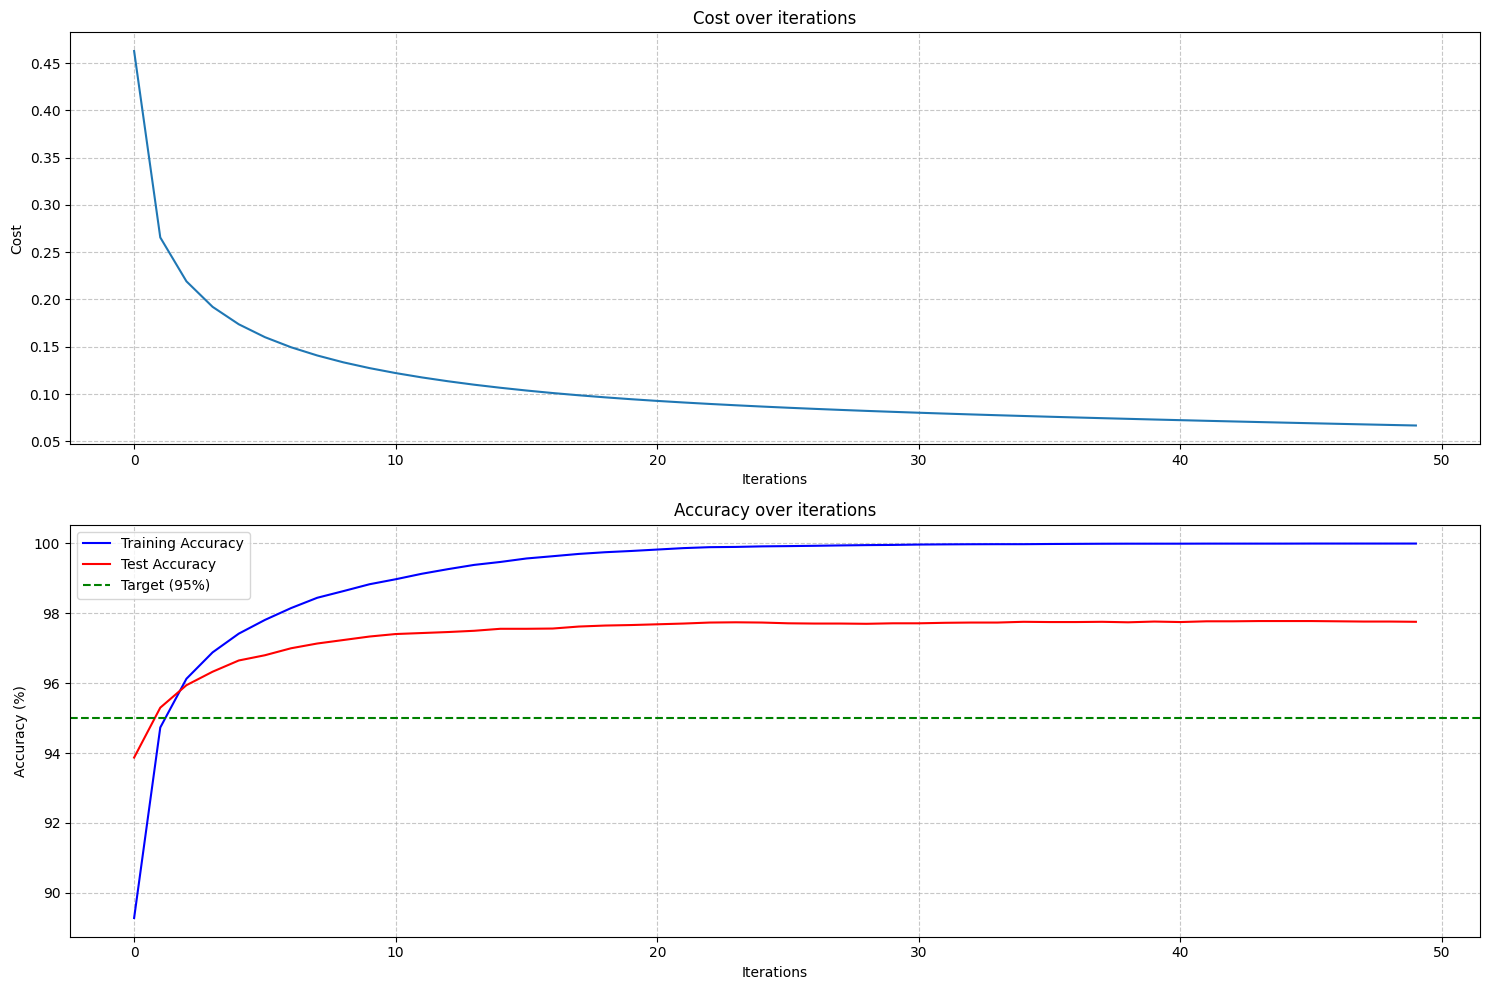

Test Accuracy: 97.76%

Per-class metrics:
------------------
Class 0: Precision: 0.9888, Recall: 0.9851, F1: 0.9869
Class 1: Precision: 0.9893, Recall: 0.9869, F1: 0.9881
Class 2: Precision: 0.9616, Recall: 0.9812, F1: 0.9713
Class 3: Precision: 0.9694, Recall: 0.9728, F1: 0.9711
Class 4: Precision: 0.9852, Recall: 0.9761, F1: 0.9806
Class 5: Precision: 0.9856, Recall: 0.9670, F1: 0.9762
Class 6: Precision: 0.9816, Recall: 0.9928, F1: 0.9872
Class 7: Precision: 0.9793, Recall: 0.9741, F1: 0.9767
Class 8: Precision: 0.9733, Recall: 0.9683, F1: 0.9708
Class 9: Precision: 0.9623, Recall: 0.9697, F1: 0.9660


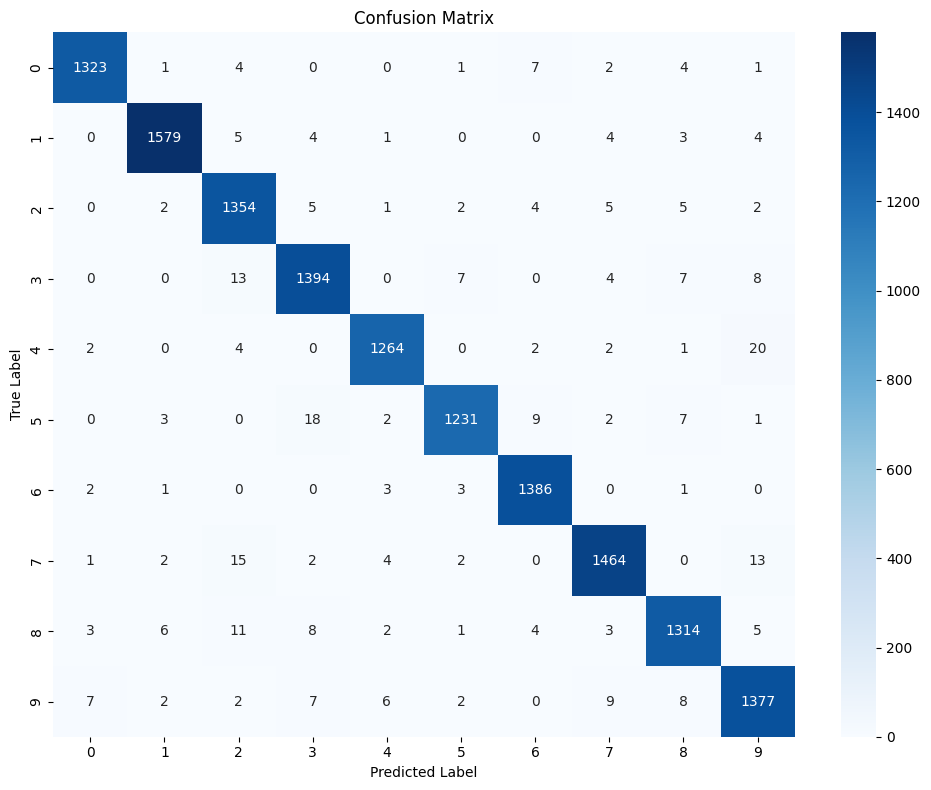

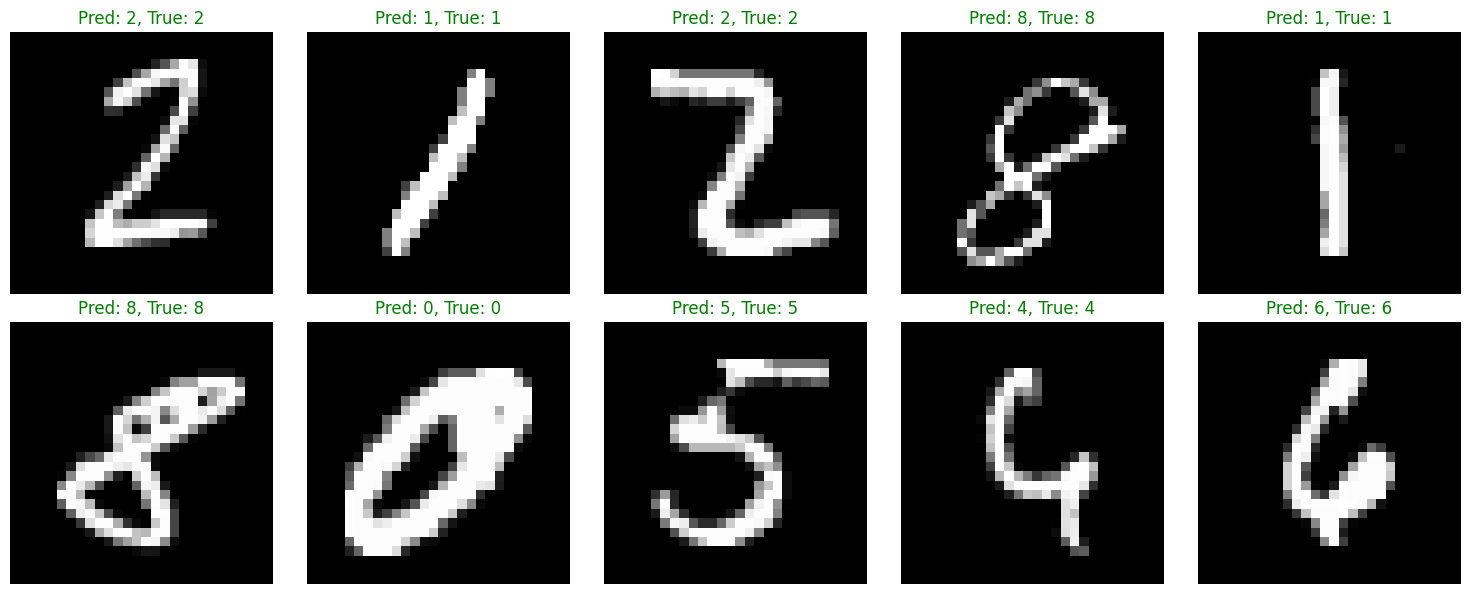

In [91]:
def training(X, yd, parameters, X_test=None, y_test=None, eta=0.05, num_iters=3000, batch_size=64, lmbda=0.01, print_cost=True):
    """
    Train the neural network model
    
    Inputs:
    - X: Input features - shape (no of features, no of examples)
    - yd: y desired values of shape (no. of classes, no. of examples)
    - parameters - The initial parameters of the model
    - X_test: Test data features (optional) for computing test accuracy during training
    - y_test: Test data labels (optional) for computing test accuracy during training
    - eta: learning rate
    - num_iters: number of iterations
    - batch_size: size of mini-batches
    - lmbda: regularization parameter
    - print_cost: boolean to print cost during training
    
    Outputs:
    - losses: list of loss at the start of each iteration
    - parameters: the final TRAINED parameters
    - train_accuracies: list of training accuracies during training
    - test_accuracies: list of test accuracies during training (if test data provided)
    """
    from tqdm.notebook import tqdm
    
    W1, b1, W2, b2, W3, b3 = parameters
    
    losses = []
    train_accuracies = []
    test_accuracies = []
    
    X_T = X.T  
    yd_T = yd.T 
    
    mini_batches = create_mini_batches(X_T, yd_T, batch_size)
    
    progress_bar = tqdm(range(num_iters), desc="Training Progress")
    
    for i in progress_bar:
        epoch_cost = 0
        correct_predictions = 0
        total_samples = 0
        
        for mini_batch in mini_batches:
            X_mini, Y_mini = mini_batch
            
            X_mini_T = X_mini.T
            Y_mini_T = Y_mini.T
            
            y_pred, l = feed_forward(X_mini_T, [W1, b1, W2, b2, W3, b3])
            
            loss_1 = loss_compute(y_pred, Y_mini_T)
            loss_2 = regularization_L2(lmbda, W1, W2, W3, X_mini.shape[0])
            total_loss = loss_1 + loss_2
            
            epoch_cost += total_loss
            
            grads = Backpropagation1(X_mini_T, Y_mini_T, l, y_pred, [W1, b1, W2, b2, W3, b3], lmbda)
            
            W1 = W1 - eta * grads['dW1']
            b1 = b1 - eta * grads['db1']
            W2 = W2 - eta * grads['dW2']
            b2 = b2 - eta * grads['db2']
            W3 = W3 - eta * grads['dW3']
            b3 = b3 - eta * grads['db3']
            
            predicted_classes = np.argmax(y_pred, axis=0)
            true_classes = np.argmax(Y_mini_T, axis=0)
            correct_predictions += np.sum(predicted_classes == true_classes)
            total_samples += Y_mini.shape[0]
        
        epoch_cost /= len(mini_batches)
        losses.append(epoch_cost)
        
        train_accuracy = (correct_predictions / total_samples) * 100
        train_accuracies.append(train_accuracy)
        
        test_accuracy = None
        if X_test is not None and y_test is not None:
            y_test_pred, _ = feed_forward(X_test, [W1, b1, W2, b2, W3, b3])
            test_predicted = np.argmax(y_test_pred, axis=0)
            test_true = np.argmax(y_test, axis=0)
            test_accuracy = (np.sum(test_predicted == test_true) / y_test.shape[1]) * 100
            test_accuracies.append(test_accuracy)
        
        progress_desc = f"Epoch {i+1}/{num_iters}"
        progress_bar.set_description(progress_desc)
        
        if print_cost and (i % 10 == 0 or i == num_iters - 1):
            status_msg = f"Epoch {i}/{num_iters} - Loss: {epoch_cost:.4f} - Train Acc: {train_accuracy:.2f}%"
            if test_accuracy is not None:
                status_msg += f" - Test Acc: {test_accuracy:.2f}%"
            progress_bar.write(status_msg)
            
        if train_accuracy > 95 and not hasattr(training, 'target_reached'):
            training.target_reached = True
    
    X_all = X.T
    y_all = yd.T
    
    chunk_size = 1000
    num_chunks = (X_all.shape[0] + chunk_size - 1) // chunk_size
    correct_predictions = 0
    total_samples = 0
    
    progress_bar.write("Calculating final accuracy...")
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min(start_idx + chunk_size, X_all.shape[0])
        
        X_chunk = X_all[start_idx:end_idx].T
        y_chunk = y_all[start_idx:end_idx].T
        
        y_pred, _ = feed_forward(X_chunk, [W1, b1, W2, b2, W3, b3])
        predicted_classes = np.argmax(y_pred, axis=0)
        true_classes = np.argmax(y_chunk, axis=0)
        
        correct_predictions += np.sum(predicted_classes == true_classes)
        total_samples += y_chunk.shape[1]
    
    final_train_accuracy = (correct_predictions / total_samples) * 100
    progress_bar.write(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
    
    if X_test is not None and y_test is not None:
        y_test_pred, _ = feed_forward(X_test, [W1, b1, W2, b2, W3, b3])
        test_predicted = np.argmax(y_test_pred, axis=0)
        test_true = np.argmax(y_test, axis=0)
        final_test_accuracy = (np.sum(test_predicted == test_true) / y_test.shape[1]) * 100
        progress_bar.write(f"Final Test Accuracy: {final_test_accuracy:.2f}%")
    
    if X_test is not None and y_test is not None:
        return losses, [W1, b1, W2, b2, W3, b3], train_accuracies, test_accuracies
    else:
        return losses, [W1, b1, W2, b2, W3, b3], train_accuracies

def main():
    X, y = load_mnist()
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    X_train = X_train.T
    X_test = X_test.T
    
    y_train_encoded = one_hot_encode(y_train)
    y_test_encoded = one_hot_encode(y_test)
    
    y_train_encoded = y_train_encoded.T
    y_test_encoded = y_test_encoded.T
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train_encoded.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test_encoded.shape}")
    
    input_size = X_train.shape[0]  # 784
    hidden_layer1 = 256
    hidden_layer2 = 256
    output_size = 10  
    
    parameters = Initialization(input_size, hidden_layer1, hidden_layer2, output_size)
    
    print("Training model...")
    start_time = time.time()
    
    losses, parameters, train_accuracies, test_accuracies = training(
        X_train, 
        y_train_encoded, 
        parameters,
        X_test=X_test,
        y_test=y_test_encoded,
        eta=0.05,          
        num_iters=50,      
        batch_size=64,      
        lmbda=0.01,         
        print_cost=True
    )
    
    print(f"Training time: {time.time() - start_time:.2f} seconds")
    
    visualize_training(losses, train_accuracies, test_accuracies)
    
    y_test_pred, _ = feed_forward(X_test, parameters)
    test_predicted_classes = np.argmax(y_test_pred, axis=0)
    test_true_classes = np.argmax(y_test_encoded, axis=0)
    
    class_names = [str(i) for i in range(10)]  # Class names 0-9
    confusion_mat = plot_confusion_matrix(test_true_classes, test_predicted_classes, class_names)
    
    visualize_predictions(X_test, y_test_encoded, parameters)

if __name__ == "__main__":
    main()

## Compare changing parameters on models

In [118]:
def create_mini_batches(X, y, batch_size):
    """
    Create mini-batches from the dataset
    """
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-10]  # Features
        Y_mini = mini_batch[:, -10:]   # Labels
        mini_batches.append((X_mini, Y_mini))
    
    # Handle the end case (last mini-batch < batch_size)
    if data.shape[0] % batch_size != 0:
        mini_batch = data[n_minibatches * batch_size:, :]
        X_mini = mini_batch[:, :-10]
        Y_mini = mini_batch[:, -10:]
        mini_batches.append((X_mini, Y_mini))
    
    return mini_batches

# Model 1: Original model with 2 hidden layers (256, 256)


In [ ]:
class Model1:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.parameters = self.initialize_parameters()
        
    def initialize_parameters(self):
        """Initialize parameters for neural network"""
        np.random.seed(42)
        
        W1 = np.random.randn(self.hidden_size1, self.input_size) * np.sqrt(2. / self.input_size)
        b1 = np.zeros((self.hidden_size1, 1))
        
        W2 = np.random.randn(self.hidden_size2, self.hidden_size1) * np.sqrt(2. / self.hidden_size1)
        b2 = np.zeros((self.hidden_size2, 1))
        
        W3 = np.random.randn(self.output_size, self.hidden_size2) * np.sqrt(2. / self.hidden_size2)
        b3 = np.zeros((self.output_size, 1))
        
        return [W1, b1, W2, b2, W3, b3]
    
    def feed_forward(self, X):
        """Forward propagation"""
        W1, b1, W2, b2, W3, b3 = self.parameters
        
        layers_cache = []
        
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        layers_cache.append(Z1)
        layers_cache.append(A1)
        
        Z2 = np.dot(W2, A1) + b2
        A2 = relu(Z2)
        layers_cache.append(Z2)
        layers_cache.append(A2)
        
        Z3 = np.dot(W3, A2) + b3
        A3 = softmax(Z3)
        layers_cache.append(Z3)
        layers_cache.append(A3)
        
        return A3, layers_cache
    
    def backward_propagation(self, X, Y, cache, y_pred, lmbda):
        """
        Compute gradients for backpropagation
        """
        m = X.shape[1]
        W1, b1, W2, b2, W3, b3 = self.parameters
        
        z1, a1, z2, a2, z3, a3 = cache
        
        grads = {}
        
        dA3 = y_pred - Y
        dZ3, dW3, db3 = back_prop_linear(dA3, z3, a2, 'softmax', m, lmbda, W3)
        
        dA2 = back_prop_actf(W3, dZ3)
        dZ2, dW2, db2 = back_prop_linear(dA2, z2, a1, 'relu', m, lmbda, W2)
        
        dA1 = back_prop_actf(W2, dZ2)
        dZ1, dW1, db1 = back_prop_linear(dA1, z1, X, 'relu', m, lmbda, W1)
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW3'] = dW3
        grads['db3'] = db3
        
        return grads
    
    def get_weights(self):
        """Return weights for regularization"""
        W1, b1, W2, b2, W3, b3 = self.parameters
        return [W1, W2, W3]
    
    def update_parameters(self, grads, learning_rate):
        """Update parameters using gradient descent"""
        W1, b1, W2, b2, W3, b3 = self.parameters
        
        W1 = W1 - learning_rate * grads['dW1']
        b1 = b1 - learning_rate * grads['db1']
        W2 = W2 - learning_rate * grads['dW2']
        b2 = b2 - learning_rate * grads['db2']
        W3 = W3 - learning_rate * grads['dW3']
        b3 = b3 - learning_rate * grads['db3']
        
        self.parameters = [W1, b1, W2, b2, W3, b3]
    
    def predict(self, X):
        """Make predictions"""
        y_pred, _ = self.feed_forward(X)
        predictions = np.argmax(y_pred, axis=0)
        return predictions

# Model 2: 4 hidden layers (256, 128, 128, 64)


In [ ]:
class Model2:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.parameters = self.initialize_parameters()
        
    def initialize_parameters(self):
        """Initialize parameters for neural network with 4 hidden layers"""
        np.random.seed(42)
        
        parameters = []
        
        W1 = np.random.randn(self.hidden_sizes[0], self.input_size) * np.sqrt(2. / self.input_size)
        b1 = np.zeros((self.hidden_sizes[0], 1))
        parameters.extend([W1, b1])
        
        for i in range(1, len(self.hidden_sizes)):
            W = np.random.randn(self.hidden_sizes[i], self.hidden_sizes[i-1]) * np.sqrt(2. / self.hidden_sizes[i-1])
            b = np.zeros((self.hidden_sizes[i], 1))
            parameters.extend([W, b])
        
        W_out = np.random.randn(self.output_size, self.hidden_sizes[-1]) * np.sqrt(2. / self.hidden_sizes[-1])
        b_out = np.zeros((self.output_size, 1))
        parameters.extend([W_out, b_out])
        
        return parameters
    
    def feed_forward(self, X):
        """Forward propagation through all layers"""
        parameters = self.parameters
        layers_cache = []
        
        A = X
        
        for i in range(0, len(parameters) - 2, 2):
            W = parameters[i]
            b = parameters[i+1]
            
            Z = np.dot(W, A) + b
            A = relu(Z)
            
            layers_cache.append(Z)
            layers_cache.append(A)
        
        W_out = parameters[-2]
        b_out = parameters[-1]
        Z_out = np.dot(W_out, A) + b_out
        A_out = softmax(Z_out)
        
        layers_cache.append(Z_out)
        layers_cache.append(A_out)
        
        return A_out, layers_cache
    
    def backward_propagation(self, X, Y, cache, y_pred, lmbda):
        """
        Compute gradients for backpropagation through all layers
        """
        m = X.shape[1]
        parameters = self.parameters
        num_layers = len(parameters) // 2
        
        grads = {}
        
        all_Z = cache[::2]  # Z values (odd indices)
        all_A = cache[1::2]  # A values (even indices)
        
        all_A = [X] + all_A
        
        dA = y_pred - Y
        
        for l in range(num_layers, 0, -1):
            Z_curr = all_Z[l-1]
            A_prev = all_A[l-1]
            W_curr = parameters[(l-1)*2]
            
            act_fn = 'softmax' if l == num_layers else 'relu'
            
            dZ, dW, db = back_prop_linear(dA, Z_curr, A_prev, act_fn, m, lmbda, W_curr)
            
            grads[f'dW{l}'] = dW
            grads[f'db{l}'] = db
            
            if l > 1:
                dA = back_prop_actf(W_curr, dZ)
        
        return grads
    
    def get_weights(self):
        """Return weights for regularization"""
        return [self.parameters[i] for i in range(0, len(self.parameters), 2)]
    
    def update_parameters(self, grads, learning_rate):
        """Update parameters using gradient descent"""
        num_layers = len(self.parameters) // 2
        
        for l in range(1, num_layers + 1):
            self.parameters[(l-1)*2] = self.parameters[(l-1)*2] - learning_rate * grads[f'dW{l}']
            self.parameters[(l-1)*2 + 1] = self.parameters[(l-1)*2 + 1] - learning_rate * grads[f'db{l}']
    
    def predict(self, X):
        """Make predictions"""
        y_pred, _ = self.feed_forward(X)
        predictions = np.argmax(y_pred, axis=0)
        return predictions

# Model 3: Same as Model 1 but with different learning rate


In [ ]:
class Model3(Model1):
    # Inherits everything from Model1, just use with a different learning rate
    pass

def train_model(model, X_train, y_train, X_val, y_val, 
               learning_rate=0.05, num_epochs=10, batch_size=64, 
               lambda_reg=0.01, print_cost=True):
    """
    Generic training function for any model
    """
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    
    X_T = X_train.T  
    y_T = y_train.T  
    
    mini_batches = create_mini_batches(X_T, y_T, batch_size)
    
    progress_bar = tqdm(range(num_epochs), desc="Training")
    
    for epoch in progress_bar:
        epoch_cost = 0
        correct_predictions = 0
        total_samples = 0
        
        for mini_batch in mini_batches:
            X_mini, Y_mini = mini_batch
            
            X_mini_T = X_mini.T  # (n_features, n_samples)
            Y_mini_T = Y_mini.T  # (n_classes, n_samples)
            
            y_pred, cache = model.feed_forward(X_mini_T)
            
            loss_1 = loss_compute(y_pred, Y_mini_T)
            loss_2 = regularization_L2(lambda_reg, model.get_weights(), X_mini.shape[0])
            total_loss = loss_1 + loss_2
            
            epoch_cost += total_loss
            
            grads = model.backward_propagation(X_mini_T, Y_mini_T, cache, y_pred, lambda_reg)
            
            model.update_parameters(grads, learning_rate)
            
            predicted_classes = np.argmax(y_pred, axis=0)
            true_classes = np.argmax(Y_mini_T, axis=0)
            correct_predictions += np.sum(predicted_classes == true_classes)
            total_samples += Y_mini.shape[0]
        
        epoch_cost /= len(mini_batches)
        train_losses.append(epoch_cost)
        
        train_accuracy = (correct_predictions / total_samples) * 100
        train_accuracies.append(train_accuracy)
        
        y_val_pred, _ = model.feed_forward(X_val)
        val_loss = loss_compute(y_val_pred, y_val)
        val_reg_loss = regularization_L2(lambda_reg, model.get_weights(), X_val.shape[1])
        val_total_loss = val_loss + val_reg_loss
        val_losses.append(val_total_loss)
        
        val_predicted = np.argmax(y_val_pred, axis=0)
        val_true = np.argmax(y_val, axis=0)
        val_accuracy = (np.sum(val_predicted == val_true) / y_val.shape[1]) * 100
        val_accuracies.append(val_accuracy)
        
        progress_desc = f"Epoch {epoch}/{num_epochs}"
        progress_bar.set_description(progress_desc)
        
        if print_cost and (epoch % 10 == 0 or epoch == num_epochs - 1):
            status_msg = f"Epoch {epoch}/{num_epochs} - Train Loss: {epoch_cost:.4f} - Train Acc: {train_accuracy:.2f}% - Val Loss: {val_total_loss:.4f} - Val Acc: {val_accuracy:.2f}%"
            progress_bar.write(status_msg)
    
    return train_losses, train_accuracies, val_losses, val_accuracies

In [ ]:
def plot_comparison(train_losses_list, train_acc_list, test_losses_list, test_acc_list, model_names):
    """
    Plot comparison of different models
    """
    plt.figure(figsize=(16, 12))
    
    # Training Loss
    plt.subplot(2, 2, 1)
    for i, losses in enumerate(train_losses_list):
        plt.plot(losses, label=f"{model_names[i]} - Train Loss")
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Training Accuracy
    plt.subplot(2, 2, 2)
    for i, acc in enumerate(train_acc_list):
        plt.plot(acc, label=f"{model_names[i]} - Train Acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Test Loss
    plt.subplot(2, 2, 3)
    for i, losses in enumerate(test_losses_list):
        plt.plot(losses, label=f"{model_names[i]} - Test Loss")
    plt.title("Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Test Accuracy
    plt.subplot(2, 2, 4)
    for i, acc in enumerate(test_acc_list):
        plt.plot(acc, label=f"{model_names[i]} - Test Acc")
    plt.title("Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Loading MNIST dataset...
X_train shape: (784, 56000)
y_train shape: (10, 56000)
X_test shape: (784, 14000)
y_test shape: (10, 14000)
Creating models...

Training Model 1 (2 hidden layers, 256 neurons each)...


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0/10 - Train Loss: 0.4627 - Train Acc: 89.28% - Val Loss: 0.2227 - Val Acc: 93.87%
Epoch 9/10 - Train Loss: 0.1274 - Train Acc: 98.83% - Val Loss: 0.0915 - Val Acc: 97.34%

Training Model 2 (4 hidden layers: 256, 128, 128, 64)...


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0/10 - Train Loss: 0.4552 - Train Acc: 89.10% - Val Loss: 0.1800 - Val Acc: 94.55%
Epoch 9/10 - Train Loss: 0.1064 - Train Acc: 99.72% - Val Loss: 0.0989 - Val Acc: 97.28%

Training Model 3 (2 hidden layers, learning rate 0.005)...


Training:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0/10 - Train Loss: 1.1168 - Train Acc: 74.15% - Val Loss: 0.5284 - Val Acc: 86.31%
Epoch 9/10 - Train Loss: 0.2896 - Train Acc: 94.15% - Val Loss: 0.2159 - Val Acc: 93.98%


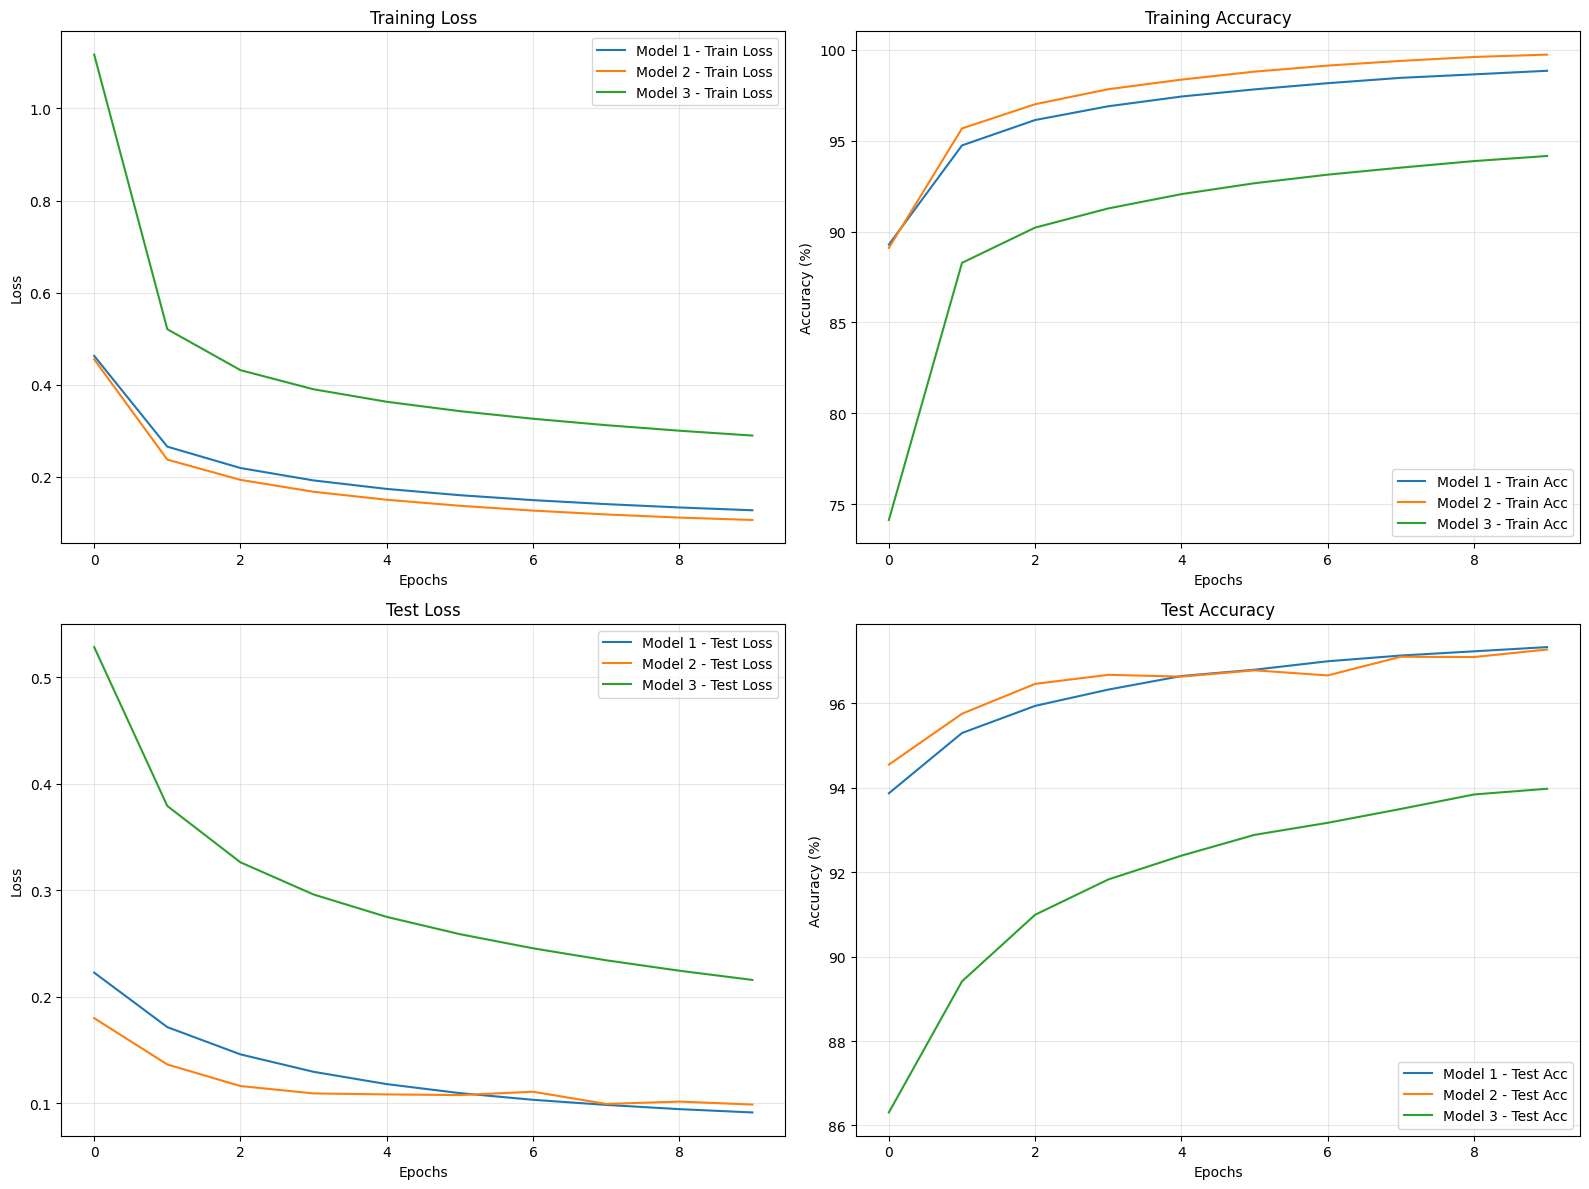


Final Test Accuracies:
Model 1 (2 hidden layers, 256 neurons each): 97.34%
Model 2 (4 hidden layers: 256, 128, 128, 64): 97.28%
Model 3 (2 hidden layers, learning rate 0.005): 93.98%


In [ ]:
def main_comparison():
    
    print("Loading MNIST dataset...")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
    
    X = X.to_numpy().astype('float32')
    y = y.to_numpy().astype('int32')
    
    X = X / 255.0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = X_train.T
    X_test = X_test.T
    
    y_train_encoded = one_hot_encode(y_train).T  # (classes, samples)
    y_test_encoded = one_hot_encode(y_test).T    # (classes, samples)
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train_encoded.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test_encoded.shape}")
    
    input_size = X_train.shape[0]  # 784
    output_size = 10               # 10 classes
    
    print("Creating models...")
    model1 = Model1(input_size, 256, 256, output_size)
    model2 = Model2(input_size, [256, 128, 128, 64], output_size)
    model3 = Model3(input_size, 256, 256, output_size)
    
    num_epochs = 10 
    batch_size = 64
    lambda_reg = 0.01
    
    print("\nTraining Model 1 (2 hidden layers, 256 neurons each)...")
    train_losses1, train_acc1, test_losses1, test_acc1 = train_model(
        model1, X_train, y_train_encoded, X_test, y_test_encoded,
        learning_rate=0.05, num_epochs=num_epochs, batch_size=batch_size,
        lambda_reg=lambda_reg
    )
    
    print("\nTraining Model 2 (4 hidden layers: 256, 128, 128, 64)...")
    train_losses2, train_acc2, test_losses2, test_acc2 = train_model(
        model2, X_train, y_train_encoded, X_test, y_test_encoded,
        learning_rate=0.05, num_epochs=num_epochs, batch_size=batch_size,
        lambda_reg=lambda_reg
    )
    
    print("\nTraining Model 3 (2 hidden layers, learning rate 0.005)...")
    train_losses3, train_acc3, test_losses3, test_acc3 = train_model(
        model3, X_train, y_train_encoded, X_test, y_test_encoded,
        learning_rate=0.005, num_epochs=num_epochs, batch_size=batch_size,
        lambda_reg=lambda_reg
    )
    
    model_names = ["Model 1", "Model 2", "Model 3"]
    train_losses_list = [train_losses1, train_losses2, train_losses3]
    train_acc_list = [train_acc1, train_acc2, train_acc3]
    test_losses_list = [test_losses1, test_losses2, test_losses3]
    test_acc_list = [test_acc1, test_acc2, test_acc3]
    
    plot_comparison(train_losses_list, train_acc_list, test_losses_list, test_acc_list, model_names)
    
    print("\nFinal Test Accuracies:")
    print(f"Model 1 (2 hidden layers, 256 neurons each): {test_acc1[-1]:.2f}%")
    print(f"Model 2 (4 hidden layers: 256, 128, 128, 64): {test_acc2[-1]:.2f}%")
    print(f"Model 3 (2 hidden layers, learning rate 0.005): {test_acc3[-1]:.2f}%")

if __name__ == "__main__":
    main_comparison()

## Here we see how much Learning Rate is important &#128527;


# My Model for MlP 😎

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

def load_mnist():
    """
    Load the MNIST dataset
    """
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
    
    # Convert DataFrame to numpy array
    X = X.to_numpy().astype('float32')
    y = y.to_numpy().astype('int32')
    
    # Use custom normalization instead of simple division
    X = normalization(X)
    
    # Reshape if needed
    if len(X.shape) == 2:
        X = X.reshape(X.shape[0], 28, 28, 1)
    
    return X, y

def preprocess_data(X, y, test_size=0.2, random_state=42):
    """
    Split and preprocess the data
    """
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Reshape input data to 2D if it's not already
    if len(X_train.shape) > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Apply standardization to features
    # Note: We'll apply standardization per sample, not per feature as is typically done
    for i in range(X_train.shape[0]):
        X_train[i] = standardize(X_train[i])
    
    for i in range(X_test.shape[0]):
        X_test[i] = standardize(X_test[i])
    
    return X_train, X_test, y_train, y_test
def one_hot_encode(y, num_classes=None):
    """
    One-hot encode the target values
    """
    if num_classes is None:
        num_classes = np.max(y) + 1
    
    y_one_hot = np.zeros((y.shape[0], num_classes))
    y_one_hot[np.arange(y.shape[0]), y] = 1
    
    return y_one_hot

In [93]:
def initialize_parameters(layer_dims, initialization_method="he"):
    """
    Initialize the weights and biases for all layers
    
    Parameters:
    layer_dims -- List containing the dimensions of each layer
    initialization_method -- Method to use for weight initialization ('he', 'xavier', 'random')
    
    Returns:
    parameters -- Dictionary containing the initialized weights and biases
    """
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        if initialization_method == "he":
            # He initialization (good for ReLU)
            parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l-1])
            parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        elif initialization_method == "xavier":
            # Xavier initialization (good for sigmoid/tanh)
            parameters[f'W{l}'], parameters[f'b{l}'] = xavier_init(layer_dims[l-1], layer_dims[l])
        elif initialization_method == "random":
            # Random initialization
            parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
            parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        else:
            raise ValueError("Initialization method not recognized")
    
    return parameters

# Activation Functions

## Sigmoid Activation Function

The sigmoid function maps any input value to a value between 0 and 1, making it useful for binary classification problems.

### Formula:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

### Derivative:
$$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$$

### Shapes:
- Input Z: Shape (n, m) where n is the number of neurons in the current layer and m is the batch size
- Output A: Same shape as Z: (n, m)
- Cache: Stores Z with shape (n, m) for backpropagation

In [94]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ

In [95]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [96]:
def softmax(Z):
    # Shift Z for numerical stability
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    cache = Z
    return A, cache

def softmax_backward(dA, cache):
    # For softmax with cross-entropy loss, this is typically simplified
    return dA

In [97]:
def linear_forward(A_prev, W, b):
    """
    Linear part of a layer's forward propagation
    
    Parameters:
    A_prev -- activations from previous layer
    W -- weights matrix
    b -- bias vector
    
    Returns:
    Z -- the input of the activation function
    cache -- a tuple containing A_prev, W, b for backward propagation
    """
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Forward propagation for one layer
    
    Parameters:
    A_prev -- activations from previous layer
    W -- weights matrix
    b -- bias vector
    activation -- the activation to be used ("sigmoid", "relu", or "softmax")
    
    Returns:
    A -- the output of the activation function
    cache -- tuple containing the linear_cache and the activation_cache
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    elif activation == "softmax":
        A, activation_cache = softmax(Z)
    else:
        raise ValueError("Activation function not recognized")
    
    cache = (linear_cache, activation_cache)
    
    return A, cache

def L_model_forward(X, parameters, hidden_activations="relu", output_activation="softmax"):
    """
    Forward propagation for the entire L-layer model
    
    Parameters:
    X -- input data, shape (input size, number of examples)
    parameters -- dictionary containing the parameters
    hidden_activations -- activation function to use for hidden layers
    output_activation -- activation function to use for output layer
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches for all layers
    """
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers
    
    # Hidden layers
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(
            A_prev, 
            parameters[f'W{l}'], 
            parameters[f'b{l}'], 
            hidden_activations
        )
        caches.append(cache)
    
    # Output layer
    AL, cache = linear_activation_forward(
        A, 
        parameters[f'W{L}'], 
        parameters[f'b{L}'], 
        output_activation
    )
    caches.append(cache)
    
    return AL, caches

In [98]:
def compute_cost(AL, Y, parameters=None, lambd=0):
    """
    Compute the cross-entropy cost
    
    Parameters:
    AL -- probability vector of shape (num_classes, number of examples)
    Y -- true labels vector of shape (num_classes, number of examples)
    parameters -- dictionary containing the parameters (optional, for L2 regularization)
    lambd -- regularization parameter (default is 0)
    
    Returns:
    cost -- cross-entropy cost with regularization
    """
    m = Y.shape[1]
    
    # Cross-entropy cost
    cost = -np.sum(Y * np.log(AL + 1e-8)) / m
    
    # Add L2 regularization if parameters are provided
    if parameters is not None and lambd > 0:
        L = len(parameters) // 2
        l2_cost = 0
        for l in range(1, L + 1):
            l2_cost += np.sum(np.square(parameters[f'W{l}']))
        cost += (lambd / (2 * m)) * l2_cost
    
    return cost

def mse_cost(AL, Y):
    """
    Compute the Mean Squared Error cost
    
    Parameters:
    AL -- output of the network
    Y -- true labels
    
    Returns:
    cost -- MSE cost
    """
    m = Y.shape[1]
    cost = np.sum((AL - Y) ** 2) / (2 * m)
    return cost

In [99]:
def linear_backward(dZ, cache, lambd=0):
    """
    Linear part of backward propagation for a single layer
    
    Parameters:
    dZ -- gradient of the cost with respect to the linear output
    cache -- tuple of (A_prev, W, b) from forward propagation
    lambd -- regularization parameter
    
    Returns:
    dA_prev -- gradient of the cost with respect to the activation of the previous layer
    dW -- gradient of the cost with respect to W
    db -- gradient of the cost with respect to b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ, A_prev.T) / m + (lambd / m) * W
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation, lambd=0):
    """
    Backward propagation for one layer
    
    Parameters:
    dA -- post-activation gradient for current layer
    cache -- tuple of (linear_cache, activation_cache)
    activation -- the activation to be used ("sigmoid", "relu", or "softmax")
    lambd -- regularization parameter
    
    Returns:
    dA_prev -- gradient of the cost with respect to the activation of the previous layer
    dW -- gradient of the cost with respect to W
    db -- gradient of the cost with respect to b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
    else:
        raise ValueError("Activation function not recognized")
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches, hidden_activations="relu", output_activation="softmax", lambd=0):
    """
    Backward propagation for the entire L-layer network
    
    Parameters:
    AL -- output of the forward propagation (L_model_forward)
    Y -- true labels
    caches -- list of caches from L_model_forward
    hidden_activations -- activation function used in hidden layers
    output_activation -- activation function used in output layer
    lambd -- regularization parameter
    
    Returns:
    grads -- dictionary with the gradients
    """
    grads = {}
    L = len(caches)  # number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)  # ensure Y has the same shape as AL
    
    # Initialize the backpropagation
    if output_activation == "softmax":
        # Gradient of softmax with cross-entropy can be simplified
        dAL = AL - Y
    else:
        # For other activation functions
        dAL = -(np.divide(Y, AL + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))
    
    # Last layer (different activation)
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
        dAL, current_cache, output_activation, lambd
    )
    grads[f"dA{L-1}"] = dA_prev_temp
    grads[f"dW{L}"] = dW_temp
    grads[f"db{L}"] = db_temp
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
            grads[f"dA{l+1}"], current_cache, hidden_activations, lambd
        )
        
        grads[f"dA{l}"] = dA_prev_temp
        grads[f"dW{l+1}"] = dW_temp
        grads[f"db{l+1}"] = db_temp
    
    return grads

In [100]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Parameters:
    parameters -- dictionary containing the parameters
    grads -- dictionary containing the gradients
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    parameters -- dictionary containing the updated parameters
    """
    L = len(parameters) // 2  # number of layers
    
    for l in range(1, L + 1):
        parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate * grads[f"dW{l}"]
        parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate * grads[f"db{l}"]
    
    return parameters

def mini_batch_sgd(X, Y, parameters, layer_dims, learning_rate=0.01, num_epochs=100, 
                  batch_size=64, hidden_activations="relu", output_activation="softmax",
                  lambd=0, print_cost=True):
    """
    Implements mini-batch SGD
    
    Parameters:
    X -- input data, shape (input size, number of examples)
    Y -- true labels, shape (output size, number of examples)
    parameters -- dictionary containing the parameters
    layer_dims -- list containing the dimensions of each layer
    learning_rate -- learning rate of the gradient descent update rule
    num_epochs -- number of epochs
    batch_size -- size of the mini-batches
    hidden_activations -- activation function for hidden layers
    output_activation -- activation function for output layer
    lambd -- regularization parameter
    print_cost -- if True, print the cost every 100 iterations
    
    Returns:
    parameters -- dictionary containing the updated parameters
    costs -- list of costs during training
    """
    costs = []
    m = X.shape[1]
    num_batches = m // batch_size
    
    for epoch in range(num_epochs):
        epoch_cost = 0
        
        # Shuffle the data
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]
        
        for b in range(num_batches):
            # Get mini-batch
            start_idx = b * batch_size
            end_idx = min((b + 1) * batch_size, m)
            X_batch = X_shuffled[:, start_idx:end_idx]
            Y_batch = Y_shuffled[:, start_idx:end_idx]
            
            # Forward propagation
            AL, caches = L_model_forward(
                X_batch, parameters, hidden_activations, output_activation
            )
            
            # Compute cost
            batch_cost = compute_cost(AL, Y_batch, parameters, lambd)
            epoch_cost += batch_cost
            
            # Backward propagation
            grads = L_model_backward(
                AL, Y_batch, caches, hidden_activations, output_activation, lambd
            )
            
            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)
        
        # Calculate average cost for the epoch
        epoch_cost /= num_batches
        
        # Print and save cost
        if print_cost and epoch % 10 == 0:
            print(f"Cost after epoch {epoch}: {epoch_cost}")
        
        if epoch % 10 == 0:
            costs.append(epoch_cost)
    
    return parameters, costs

In [101]:
class MLP:
    """
    Multi-Layer Perceptron Neural Network implementation from scratch
    """
    
    def __init__(self, layer_dims, hidden_activations="relu", output_activation="softmax",
                initialization="he", learning_rate=0.01, num_epochs=100, batch_size=64,
                lambd=0, verbose=True, plot_interval=5):
        """
        Initialize the MLP model
        
        Parameters:
        layer_dims -- list containing the dimensions of each layer
        hidden_activations -- activation function for hidden layers
        output_activation -- activation function for output layer
        initialization -- weight initialization method
        learning_rate -- learning rate for optimization
        num_epochs -- number of training epochs
        batch_size -- size of mini-batches
        lambd -- regularization parameter
        verbose -- whether to print progress
        plot_interval -- number of epochs between plotting (default: 5)
        """
        self.layer_dims = layer_dims
        self.hidden_activations = hidden_activations
        self.output_activation = output_activation
        self.initialization = initialization
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.lambd = lambd
        self.verbose = verbose
        self.plot_interval = plot_interval
        self.parameters = None
        self.costs = []
        self.train_accuracies = []  # List to store training accuracies
        self.test_accuracies = []   # List to store test accuracies
    
    def fit(self, X, y, X_test=None, y_test=None):
        """
        Train the MLP model
        
        Parameters:
        X -- input data, shape (number of examples, input size) or (input_size, number of examples)
        y -- true labels
        X_test -- optional test data for tracking test accuracy per epoch
        y_test -- optional test labels for tracking test accuracy per epoch
        
        Returns:
        self -- the trained model
        """
        # Reshape X to (input_size, num_examples) if needed
        if X.shape[0] != self.layer_dims[0]:
            X = X.T
        
        # Prepare y (one-hot encoding if needed)
        num_classes = self.layer_dims[-1]
        if len(y.shape) == 1 or y.shape[1] == 1:
            Y = one_hot_encode(y, num_classes)
        else:
            Y = y
        
        # Reshape Y to (output_size, num_examples) if needed
        if Y.shape[0] != num_classes:
            Y = Y.T
        
        # Initialize parameters
        if self.parameters is None:
            self.parameters = initialize_parameters(self.layer_dims, self.initialization)
        
        # Prepare for epochs
        costs = []
        train_accuracies = []
        test_accuracies = []
        m = X.shape[1]
        num_batches = m // self.batch_size
        
        for epoch in range(self.num_epochs):
            epoch_cost = 0
            
            # Shuffle the data
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]
            
            for b in range(num_batches):
                # Get mini-batch
                start_idx = b * self.batch_size
                end_idx = min((b + 1) * self.batch_size, m)
                X_batch = X_shuffled[:, start_idx:end_idx]
                Y_batch = Y_shuffled[:, start_idx:end_idx]
                
                # Forward propagation
                AL, caches = L_model_forward(
                    X_batch, self.parameters, 
                    self.hidden_activations, 
                    self.output_activation
                )
                
                # Compute cost
                batch_cost = compute_cost(AL, Y_batch, self.parameters, self.lambd)
                epoch_cost += batch_cost
                
                # Backward propagation
                grads = L_model_backward(
                    AL, Y_batch, caches, 
                    self.hidden_activations, 
                    self.output_activation, 
                    self.lambd
                )
                
                # Update parameters
                self.parameters = update_parameters(self.parameters, grads, self.learning_rate)
            
            # Calculate average cost for the epoch
            epoch_cost /= num_batches
            costs.append(epoch_cost)  # Save cost for each epoch now
            
            # For training accuracy, we need to be careful with shapes
            # We'll make predictions directly instead of using evaluate to avoid shape issues
            # Forward propagation on full training set
            AL_train, _ = L_model_forward(
                X, self.parameters, 
                self.hidden_activations, 
                self.output_activation
            )
            
            # Get predictions
            if self.output_activation == "softmax":
                predictions_train = np.argmax(AL_train, axis=0)
            else:
                predictions_train = (AL_train > 0.5).astype(int)
                
            # Get true labels in the right format
            if Y.shape[0] == num_classes:  # Y is one-hot encoded and transposed (output_size, n_samples)
                y_true_train = np.argmax(Y, axis=0)
            else:  # Y is one-hot encoded but not transposed (n_samples, output_size)
                y_true_train = np.argmax(Y, axis=1)
                
            # Calculate accuracy
            train_accuracy = np.mean(predictions_train == y_true_train)
            train_accuracies.append(train_accuracy)
            
            # Calculate test accuracy if test data is provided
            test_accuracy = None
            if X_test is not None and y_test is not None:
                # If X_test is in shape (n_samples, n_features), transpose it
                if X_test.shape[1] == self.layer_dims[0]:
                    X_test_reshaped = X_test.T
                else:
                    X_test_reshaped = X_test
                    
                # Forward propagation
                AL_test, _ = L_model_forward(
                    X_test_reshaped, self.parameters, 
                    self.hidden_activations, 
                    self.output_activation
                )
                
                # Get predictions
                if self.output_activation == "softmax":
                    predictions_test = np.argmax(AL_test, axis=0)
                else:
                    predictions_test = (AL_test > 0.5).astype(int)
                
                # Make sure y_test is in the right format (convert from one-hot if needed)
                if len(y_test.shape) > 1 and y_test.shape[1] > 1:
                    y_true_test = np.argmax(y_test, axis=1)
                else:
                    y_true_test = y_test
                
                # Calculate accuracy
                test_accuracy = np.mean(predictions_test == y_true_test)
                test_accuracies.append(test_accuracy)
            
            # Plot after every plot_interval epochs or after the last epoch
            if (epoch + 1) % self.plot_interval == 0 or epoch == self.num_epochs - 1:
                if X_test is not None and y_test is not None:
                    print(f"Epoch {epoch}/{self.num_epochs-1} - Loss: {epoch_cost:.4f} - Train Acc: {train_accuracy:.4f} - Test Acc: {test_accuracy:.4f}")
                else:
                    print(f"Epoch {epoch}/{self.num_epochs-1} - Loss: {epoch_cost:.4f} - Train Acc: {train_accuracy:.4f}")
        
        self.costs = costs
        self.train_accuracies = train_accuracies
        self.test_accuracies = test_accuracies

        self.plot_cost()
        self.plot_accuracy()
        
        return self
    
    def predict(self, X):
        """
        Use the trained model to predict
        
        Parameters:
        X -- input data, shape (number of examples, input size)
        
        Returns:
        predictions -- model predictions
        """
        # Reshape X to (input_size, num_examples) if needed
        if X.shape[0] != self.layer_dims[0]:
            X = X.T
        
        # Forward propagation
        AL, _ = L_model_forward(
            X, self.parameters, 
            self.hidden_activations, 
            self.output_activation
        )
        
        # Get predictions
        if self.output_activation == "softmax":
            predictions = np.argmax(AL, axis=0)
        else:
            predictions = (AL > 0.5).astype(int)
        
        return predictions
    
    def evaluate(self, X, y):
        """
        Evaluate model performance
        
        Parameters:
        X -- input data
        y -- true labels
        
        Returns:
        accuracy -- model accuracy
        """
        predictions = self.predict(X)
        
        # Convert y to 1D array of class indices if it's one-hot encoded
        if len(y.shape) > 1 and y.shape[1] > 1:
            y = np.argmax(y, axis=1)
        
        # Ensure predictions and y have the same shape
        if predictions.shape != y.shape:
            if len(predictions.shape) == 1:
                predictions = predictions.reshape(-1)
            if len(y.shape) == 1:
                y = y.reshape(-1)
        
        # Double-check that shapes match before comparison
        if predictions.shape != y.shape:
            raise ValueError(f"Shape mismatch in evaluate: predictions {predictions.shape} vs y {y.shape}")
            
        accuracy = np.mean(predictions == y)
        return accuracy
    
    def plot_cost(self):
        """
        Plot the Loss during training
        """
        if not self.costs:
            print("No cost data available to plot.")
            return
            
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.costs) + 1), self.costs)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epochs')
        plt.grid(True)
        plt.show()
        print()  # Add some space after the plot
    
    def plot_accuracy(self):
        """
        Plot the training and test accuracy during training
        """
        if not self.train_accuracies:
            print("No accuracy data available to plot.")
            return
            
        plt.figure(figsize=(10, 6))
        epochs = range(1, len(self.train_accuracies) + 1)
        
        plt.plot(epochs, self.train_accuracies, 'b-', label='Training Accuracy')
        
        if self.test_accuracies:
            plt.plot(epochs, self.test_accuracies, 'r-', label='Test Accuracy')
        
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 for accuracy
        plt.show()
        print()  # Add some space after the plot

In [102]:
def visualize_predictions(model, X, y, num_samples=5):
    """
    Visualize model predictions on random samples
    """
    indices = np.random.choice(X.shape[0], num_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        # Get sample and prediction
        sample = X[idx]
        true_label = y[idx] if len(y.shape) == 1 else np.argmax(y[idx])
        
        # Make prediction
        sample_reshaped = sample.reshape(-1, 1).T  # Reshape for the model
        pred = model.predict(sample_reshaped)[0]
        
        # Display
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample.reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_label}, Pred: {pred}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [103]:
def create_confusion_matrix(model, X, y, max_classes=10):
    """
    Create and visualize confusion matrix
    
    Parameters:
    model -- Trained model
    X -- Test data
    y -- True labels
    max_classes -- Maximum number of classes to include in visualization (for readability)
    """
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    # Get predictions
    y_pred = model.predict(X.T)
    
    # If we have too many classes, limit to first max_classes for visibility
    num_classes = len(np.unique(y))
    if num_classes > max_classes:
        # Filter samples that belong to the first max_classes
        mask = (y < max_classes)
        y_filtered = y[mask]
        y_pred_filtered = y_pred[mask]
        
        print(f"Showing confusion matrix for first {max_classes} classes out of {num_classes}")
        
        # Create confusion matrix for limited classes
        cm = confusion_matrix(y_filtered, y_pred_filtered, labels=range(max_classes))
    else:
        # Create full confusion matrix
        cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [104]:
def run_tests(model=None):
    """
    Run a series of tests to verify the implementation of the neural network
    
    Parameters:
    model -- Optional pre-trained model
    
    Returns:
    success -- Boolean indicating if all tests passed
    """
    test_results = []
    
    # Test 1: Normalization
    def test_normalization():
        np.random.seed(1)
        x = np.random.randint(0, 100, size=10)
        x_norm = normalization(x)
        return np.allclose(x_norm[1], -0.8183755)
    
    test_results.append(("Normalization", test_normalization()))
    
    # Test 2: Xavier initialization
    def test_xavier_init():
        np.random.seed(1)
        W_check, b_check = xavier_init(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
        return (W_check.shape == (2,1) and 
                b_check.shape == (1,1) and 
                np.allclose(W_check[0], [0.417022004702574]))
    
    test_results.append(("Xavier Initialization", test_xavier_init()))
    
    # Test 3: Forward propagation
    def test_forward():
        np.random.seed(1)
        X_test = np.random.randn(2,1)
        np.random.seed(2)
        W_test = np.random.randn(1,2)
        np.random.seed(3)
        b_test = np.random.randn(1,2)
        forward_test = forward(X_test, W_test, b_test)
        return np.allclose(forward_test, [[1.1116698, 0.34511309],
                                        [2.04358276, 0.47093144]])
    
    test_results.append(("Forward Propagation", test_forward()))
    
    # Test 4: Activation functions (Fixed)
    def test_activations():
        # Test sigmoid
        z_sigmoid = np.array([[-1.0, 0.0, 1.0]])
        sigmoid_output, _ = sigmoid(z_sigmoid)
        expected_sigmoid = np.array([[0.26894142, 0.5, 0.73105858]])
        sigmoid_test = np.allclose(sigmoid_output, expected_sigmoid, rtol=1e-6)
        
        # Test ReLU
        z_relu = np.array([[-1.0, 0.0, 1.0]])
        relu_output, _ = relu(z_relu)
        expected_relu = np.array([[0.0, 0.0, 1.0]])
        relu_test = np.allclose(relu_output, expected_relu)
        
        # Test softmax with controlled input
        z_softmax = np.array([[1.0, 2.0, 3.0]])
        # Transpose for correct shape based on your implementation
        z_softmax = z_softmax.T  # Shape becomes (3, 1)
        softmax_output, _ = softmax(z_softmax)
        
        # Calculate expected softmax manually
        exp_vals = np.exp([1.0, 2.0, 3.0])
        expected_softmax = exp_vals / np.sum(exp_vals)
        expected_softmax = expected_softmax.reshape(3, 1)  # Shape (3, 1)
        
        softmax_test = np.allclose(softmax_output, expected_softmax, rtol=1e-6)
        
        print("Sigmoid test:", sigmoid_test)
        print("ReLU test:", relu_test)
        print("Softmax test:", softmax_test)
        print("Softmax output:", softmax_output)
        print("Expected softmax:", expected_softmax)
        
        return sigmoid_test and relu_test and softmax_test
    
    test_results.append(("Activation Functions", test_activations()))
    
    # Test 5: Cost functions (Fixed)
    def test_cost_functions():
        # Create controlled test data
        # One-hot encoded labels (3 classes, 3 samples)
        y_true = np.array([
            [1, 0, 0],  # Class 0
            [0, 1, 0],  # Class 1
            [0, 0, 1]   # Class 2
        ])  # Shape (3, 3)
        
        # Predicted probabilities
        y_pred = np.array([
            [0.9, 0.1, 0.2],  # Predictions for sample 1
            [0.05, 0.8, 0.1],  # Predictions for sample 2
            [0.05, 0.1, 0.7]   # Predictions for sample 3
        ])  # Shape (3, 3)
        
        # Test cross-entropy cost
        # Calculate expected cost manually
        epsilon = 1e-8
        m = y_true.shape[1]
        expected_ce = -np.sum(y_true * np.log(y_pred + epsilon)) / m
        
        # Calculate using your function
        ce_cost = compute_cost(y_pred, y_true)
        
        # Test MSE cost
        # Calculate expected MSE manually
        expected_mse = np.sum((y_pred - y_true) ** 2) / (2 * m)
        
        # Calculate using your function
        mse_cost_val = mse_cost(y_pred, y_true)
        
        print("CE cost:", ce_cost)
        print("Expected CE cost:", expected_ce)
        print("MSE cost:", mse_cost_val)
        print("Expected MSE cost:", expected_mse)
        
        # Using a tolerance for floating point comparisons
        ce_test = np.isclose(ce_cost, expected_ce, rtol=1e-5)
        mse_test = np.isclose(mse_cost_val, expected_mse, rtol=1e-5)
        
        return ce_test and mse_test
    
    test_results.append(("Cost Functions", test_cost_functions()))
    
    # Test 6: Full model on small dataset
    def test_full_model():
        if model is not None:
            trained_model = model
        else:
            # Create a small synthetic dataset
            np.random.seed(42)
            X_small = np.random.randn(20, 784)
            y_small = np.random.randint(0, 10, size=20)
            
            # Create a small model
            small_model = MLP(
                layer_dims=[784, 32, 10],
                hidden_activations="relu",
                output_activation="softmax",
                initialization="he",
                learning_rate=0.01,
                num_epochs=5,
                batch_size=10,
                verbose=False
            )
            
            # Train the model
            small_model.fit(X_small.T, one_hot_encode(y_small, 10).T)
            trained_model = small_model
        
        # Check if forward and backward passes work without errors
        try:
            # Test forward pass
            X_test = np.random.randn(784, 5)
            AL, caches = L_model_forward(
                X_test, 
                trained_model.parameters,
                trained_model.hidden_activations,
                trained_model.output_activation
            )
            
            # Test backward pass
            Y_test = np.zeros((10, 5))
            Y_test[np.random.randint(0, 10, size=5), np.arange(5)] = 1
            
            grads = L_model_backward(
                AL, 
                Y_test, 
                caches,
                trained_model.hidden_activations,
                trained_model.output_activation
            )
            
            # Test parameter update
            update_parameters(trained_model.parameters, grads, 0.01)
            
            return True
        except Exception as e:
            print(f"Error in full model test: {e}")
            return False
    
    test_results.append(("Full Model", test_full_model()))
    
    # Test 7: MNIST performance (if model is provided)
    if model is not None:
        def test_mnist_performance():
            # Load a small portion of MNIST for quick testing
            X, y = load_mnist()
            X_train, X_test, y_train, y_test = preprocess_data(X, y, test_size=0.9)  # Just use 10% for speed
            
            # Evaluate model
            test_accuracy = model.evaluate(X_test, y_test)
            return test_accuracy > 0.8  # 80% accuracy threshold for passing
        
        test_results.append(("MNIST Performance", test_mnist_performance()))
    
    # Print test results
    print("\n===== TEST RESULTS =====")
    all_passed = True
    for test_name, test_passed in test_results:
        status = "PASSED ✅" if test_passed else "FAILED ❌"
        print(f"{test_name}: {status}")
        all_passed = all_passed and test_passed
    
    if all_passed:
        print("\nAll tests passed! Your implementation meets the requirements. 🎉")
    else:
        print("\nSome tests failed. Please review the test results and fix your implementation.")
    
    return all_passed

Loading MNIST dataset...
Network architecture: [784, 256, 256, 10]
Training the model...
Epoch 4/19 - Loss: 0.0617 - Train Acc: 0.9906 - Test Acc: 0.9628
Epoch 9/19 - Loss: 0.0214 - Train Acc: 0.9989 - Test Acc: 0.9664
Epoch 14/19 - Loss: 0.0110 - Train Acc: 0.9999 - Test Acc: 0.9682
Epoch 19/19 - Loss: 0.0081 - Train Acc: 1.0000 - Test Acc: 0.9686


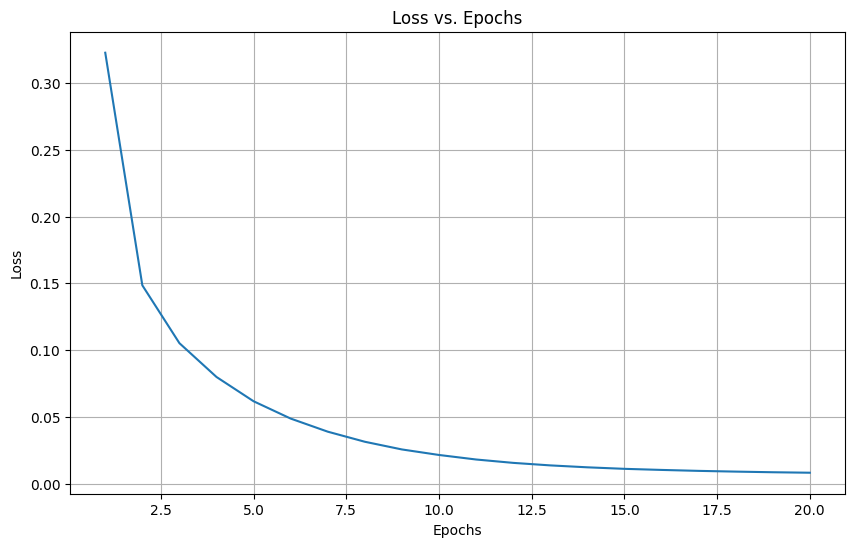

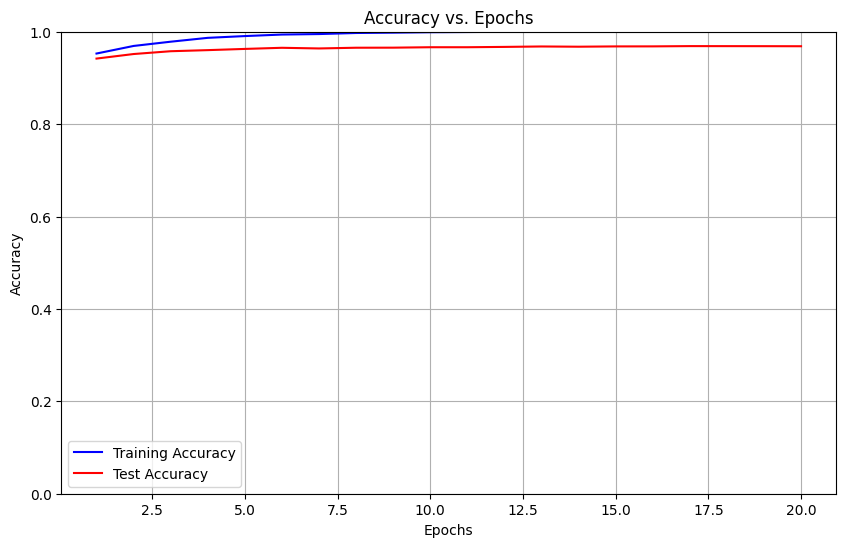



Final training accuracy: 1.0000
Final test accuracy: 0.9686


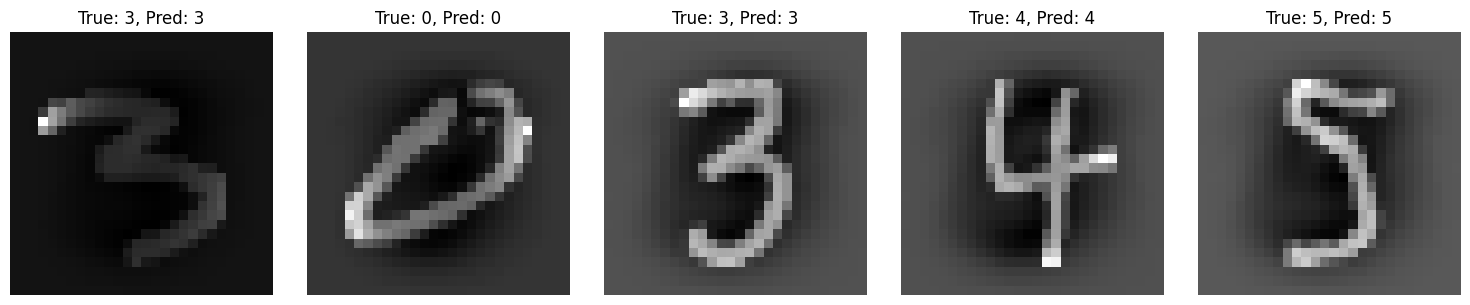

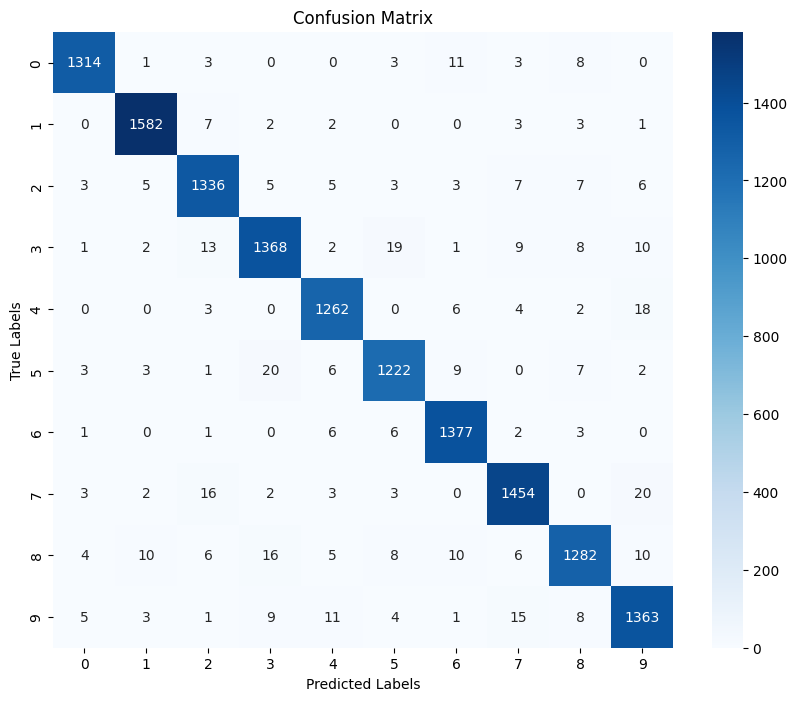


Running tests to verify implementation...
Sigmoid test: True
ReLU test: True
Softmax test: True
Softmax output: [[0.09003057]
 [0.24472847]
 [0.66524096]]
Expected softmax: [[0.09003057]
 [0.24472847]
 [0.66524096]]
CE cost: 0.2283929910046477
Expected CE cost: 0.2283929910046477
MSE cost: 0.035833333333333335
Expected MSE cost: 0.035833333333333335

===== TEST RESULTS =====
Normalization: PASSED ✅
Xavier Initialization: PASSED ✅
Forward Propagation: PASSED ✅
Activation Functions: PASSED ✅
Cost Functions: PASSED ✅
Full Model: PASSED ✅
MNIST Performance: PASSED ✅

All tests passed! Your implementation meets the requirements. 🎉


In [105]:
def main():
    # Load and preprocess MNIST data
    print("Loading MNIST dataset...")
    X, y = load_mnist()
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    # Define network architecture
    input_size = X_train.shape[1]  # 784 for MNIST
    hidden_layers = [256, 256]
    output_size = 10  # 10 classes for MNIST
    layer_dims = [input_size] + hidden_layers + [output_size]
    
    print(f"Network architecture: {layer_dims}")
    
    model = MLP(
        layer_dims=layer_dims,
        hidden_activations="relu",
        output_activation="softmax",
        initialization="he",
        learning_rate=0.05,
        num_epochs=20,
        batch_size=128,
        lambd=0.001,
        verbose=True,
        plot_interval=5
    )
    
    print("Training the model...")
    # Convert y_train to one-hot encoding for training
    y_train_onehot = one_hot_encode(y_train, 10)
    
    # Pass both train and test data to track performance during training
    model.fit(X_train.T, y_train_onehot.T, X_test, y_test)
    
    # Evaluate the final model
    train_accuracy = model.evaluate(X_train, y_train)
    test_accuracy = model.evaluate(X_test, y_test)

    print(f"\nFinal training accuracy: {train_accuracy:.4f}")
    print(f"Final test accuracy: {test_accuracy:.4f}")
    
    # Visualize some predictions
    visualize_predictions(model, X_test, y_test)

    # Create confusion matrix
    create_confusion_matrix(model, X_test, y_test)
    
    # Run tests
    print("\nRunning tests to verify implementation...")
    run_tests(model)
    
    return model

if __name__ == "__main__":
    main()

# Theorical Tasks

## Q1: 
<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

بازنمایی ها در یادگیری عمیق چه ویژگی های مختص به خود را دارند؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
1. سلسله مراتبی بودن: بازنمایی‌های یادگیری عمیق به صورت لایه‌ای و سلسله مراتبی شکل می‌گیرند، به طوری که هر لایه بازنمایی‌های پیچیده‌تر و انتزاعی‌تری را از داده‌ها استخراج می‌کند.

2. غیرخطی بودن: برخلاف بسیاری از روش‌های سنتی، بازنمایی‌های یادگیری عمیق قادر به مدل‌سازی روابط غیرخطی پیچیده در داده‌ها هستند.

3. یادگیری خودکار ویژگی‌ها: الگوریتم‌های یادگیری عمیق قادرند بدون مداخله انسان، ویژگی‌های مناسب را از داده‌های خام استخراج کنند.

4. انتقال‌پذیری: بازنمایی‌های آموخته شده در یک وظیفه می‌توانند برای وظایف دیگر مورد استفاده قرار گیرند (یادگیری انتقالی).

5. فشرده‌سازی اطلاعات: بازنمایی‌ها معمولاً در فضایی با ابعاد کمتر از داده‌های ورودی اصلی قرار می‌گیرند، اما اطلاعات مهم را حفظ می‌کنند.

6. مقاومت به نویز: بازنمایی‌های یادگیری عمیق می‌توانند ویژگی‌های قوی را حتی در حضور نویز در داده‌ها استخراج کنند.

7.  چندسطحی بودن انتزاع: لایه‌های اولیه ویژگی‌های ساده‌تر و لایه‌های بالاتر مفاهیم انتزاعی‌تر را بازنمایی می‌کنند.
</div>

# Q2:

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
منظور از DeepLeaarning چیست؟ آیا به معنی فهم عمیق است؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
یادگیری عمیق (Deep Learning) به معنای فهم عمیق نیست، بلکه اشاره به یک زیرمجموعه خاص از یادگیری ماشین دارد که از شبکه‌های عصبی با لایه‌های متعدد (عمیق)  DNN استفاده می‌کند.
اصطلاح "عمیق" در اینجا به معمارِی شبکه‌های عصبی اشاره دارد که دارای چندین لایه پنهان هستند. این "عمق" به شبکه اجازه می‌دهد بازنمایی‌های پیچیده‌تر و انتزاعی‌تر را از داده‌های ورودی یاد بگیرد.
دلیل نامگذاری آن به "یادگیری عمیق" این است که:

شبکه‌های عصبی مورد استفاده، لایه‌های متعدد و "عمیق" دارند
این مدل‌ها قادر به استخراج ویژگی‌ها در سطوح مختلف انتزاع هستند (از سطوح پایین به سطوح بالاتر انتزاع)
توانایی مدل‌سازی روابط بسیار پیچیده و غیرخطی را دارند

بنابراین واژه "عمیق" در اینجا به معماری و ساختار الگوریتم اشاره دارد، نه به مفهوم "درک" یا "فهم" عمیق به معنای انسانی آن.

</div>

# Q3:

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
Neural Network ها بیشتر در کجا استفاده میشوند؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
شبکه‌های عصبی مصنوعی (Neural Networks) در طیف گسترده‌ای از حوزه‌ها کاربرد دارند. برخی از مهمترین کاربردهای آنها عبارتند از:

پردازش تصویر و بینایی ماشین: تشخیص اشیاء، چهره‌ها، طبقه‌بندی تصاویر و تجزیه و تحلیل تصاویر پزشکی


پردازش زبان طبیعی: ترجمه ماشینی، تولید متن، پاسخگویی به سؤالات، چت‌بات‌ها و تحلیل احساسات


تشخیص صدا و گفتار: تبدیل گفتار به متن، تشخیص دستورات صوتی و سیستم‌های دستیار صوتی


تحلیل داده‌های مالی: پیش‌بینی بازار سهام، تشخیص تقلب، ارزیابی ریسک اعتباری و الگوریتم‌های معاملاتی


پزشکی و سلامت: تشخیص بیماری‌ها، تحلیل تصاویر پزشکی، کشف دارو و پیش‌بینی نتایج درمانی


رباتیک و کنترل: یادگیری تقویتی برای کنترل ربات‌ها، خودروهای خودران و سیستم‌های کنترل پرواز


بازی‌ها و شبیه‌سازی: هوش مصنوعی در بازی‌های کامپیوتری و شبیه‌سازی‌های پیچیده


پیش‌بینی آب و هوا و تغییرات اقلیمی: مدل‌سازی سیستم‌های پیچیده آب و هوایی

</div>

# Q4:
<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
وزن ها (پارامترها) چیستند و چگونه تنظیم میشوند؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
وزن‌ها یا پارامترها در شبکه‌های عصبی، مقادیر عددی هستند که نقش کلیدی در عملکرد شبکه ایفا می‌کنند.

 وزن‌ها مقادیر عددی هستند که به اتصالات بین نورون‌ها اختصاص داده می‌شوند و قدرت تأثیر هر نورون بر نورون‌های لایه بعدی را تعیین می‌کنند.
نقش: وزن‌ها تعیین می‌کنند که هر ورودی چقدر در محاسبه خروجی نورون‌ها اهمیت دارد. وزن بزرگتر به معنای تأثیر بیشتر است.
ساختار: در یک شبکه عصبی، میلیون‌ها یا حتی میلیاردها وزن می‌تواند وجود داشته باشد که مجموعاً مدل را تشکیل می‌دهند.

چگونه تنظیم می‌شوند؟

مقداردهی اولیه: وزن‌ها معمولاً با مقادیر تصادفی کوچک مقداردهی اولیه می‌شوند (مانند توزیع گاوسی با میانگین صفر).
الگوریتم پس‌انتشار (Backpropagation): این الگوریتم اصلی‌ترین روش برای تنظیم وزن‌هاست:

ابتدا خطای مدل محاسبه می‌شود (تفاوت بین خروجی پیش‌بینی شده و مقدار واقعی)
سپس این خطا از لایه خروجی به سمت لایه‌های ورودی منتشر می‌شود
مشتق خطا نسبت به هر وزن محاسبه می‌شود (گرادیان)


بهینه‌سازها (Optimizers): الگوریتم‌هایی که وزن‌ها را به‌روزرسانی می‌کنند:

SGD (Stochastic Gradient Descent)
Adam
RMSprop
AdaGrad
و غیره


نرخ یادگیری (Learning Rate): پارامتری که تعیین می‌کند وزن‌ها در هر تکرار چقدر تغییر کنند:

نرخ بالا: یادگیری سریع‌تر اما احتمال واگرایی
نرخ پایین: یادگیری پایدارتر اما کُندتر


تنظیم‌کننده‌ها (Regularizers): روش‌هایی برای جلوگیری از بیش‌برازش:

L1 و L2 regularization که وزن‌های بزرگ را جریمه می‌کنند
Dropout که به طور تصادفی برخی نورون‌ها را در هر تکرار غیرفعال می‌کند


اپک (Epoch) و تکرار (Iteration): فرآیند آموزش طی چندین اپک انجام می‌شود و در هر اپک، وزن‌ها بر اساس تمام داده‌های آموزشی به‌روزرسانی می‌شوند.

هدف نهایی از تنظیم وزن‌ها، یافتن مجموعه‌ای از مقادیر است که خطای مدل را به حداقل برساند و عملکرد پیش‌بینی را بهینه کند.</div>

# Q5:
<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
مفاهیم Loss function, Loss Score, optimizer را توضیح داده و ارتباط بین شان را توضیح بده
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

# مفاهیم Loss Function، Loss Score و Optimizer در یادگیری عمیق

## Loss Function (تابع زیان)
تابع زیان معیاری برای سنجش میزان خطای مدل است. این تابع اختلاف بین خروجی پیش‌بینی شده توسط مدل و مقدار واقعی را محاسبه می‌کند. انواع مختلفی از توابع زیان وجود دارند:

- **MSE (Mean Squared Error)**: برای مسائل رگرسیون
- **Cross-Entropy**: برای مسائل طبقه‌بندی
- **Hinge Loss**: در SVM ها
- **Huber Loss**: برای مقاومت در برابر داده‌های پرت

## Loss Score (مقدار زیان)
Loss Score مقدار عددی خروجی تابع زیان است. این عدد نشان می‌دهد مدل چقدر در پیش‌بینی‌هایش اشتباه کرده است:

- **مقدار بزرگتر**: خطای بیشتر، عملکرد ضعیف‌تر مدل
- **مقدار کوچکتر**: خطای کمتر، عملکرد بهتر مدل

هدف در آموزش مدل، کمینه کردن این مقدار است.

## Optimizer (بهینه‌ساز)
بهینه‌ساز الگوریتمی است که چگونگی به‌روزرسانی پارامترهای مدل (وزن‌ها و بایاس‌ها) را برای کاهش Loss Score تعیین می‌کند. انواع مختلفی از بهینه‌سازها وجود دارند:

- **SGD (Stochastic Gradient Descent)**
- **Adam**: ترکیبی از Momentum و RMSProp
- **RMSprop**: با نرخ یادگیری تطبیقی
- **Adagrad**: برای داده‌های پراکنده

## ارتباط بین این مفاهیم

1. **چرخه یادگیری**:
   - مدل پیش‌بینی‌هایی انجام می‌دهد
   - تابع زیان، میزان خطا را محاسبه می‌کند (Loss Score)
   - بهینه‌ساز با استفاده از گرادیان‌ها، پارامترهای مدل را به‌روزرسانی می‌کند
   - این چرخه تکرار می‌شود تا Loss Score به حداقل برسد

2. **نقش هر کدام**:
   - تابع زیان: تعیین می‌کند چه چیزی بهینه شود
   - Loss Score: نشان می‌دهد مدل چقدر از هدف فاصله دارد
   - بهینه‌ساز: تعیین می‌کند چگونه پارامترها تغییر کنند

3. **مثال کاربردی**:
   در یک شبکه عصبی برای تشخیص تصاویر:
   - تابع زیان Cross-Entropy محاسبه می‌کند چقدر طبقه‌بندی‌ها اشتباه است
   - Loss Score عددی بین 0 تا ∞ خواهد بود (0 = پیش‌بینی کاملاً درست)
   - بهینه‌ساز SGD وزن‌ها را طوری تنظیم می‌کند که تشخیص تصاویر بهبود یابد

انتخاب مناسب ترکیب این سه عنصر برای موفقیت مدل‌های یادگیری عمیق بسیار حیاتی است.

</div>


# Q6:
<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
یادگیری بازنمایی چیست و چگونه از آن در یادگیری ماشین استفاده میشود؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

# یادگیری بازنمایی

یادگیری بازنمایی (Representation Learning) به فرآیندی اشاره دارد که در آن سیستم‌های یادگیری ماشین، بازنمایی‌های مفید و معنادار را از داده‌های خام یاد می‌گیرند. هدف اصلی یادگیری بازنمایی، تبدیل داده‌های ورودی به فضایی از ویژگی‌هاست که کار با آن‌ها آسان‌تر باشد.

## مفهوم یادگیری بازنمایی

یادگیری بازنمایی به جای استخراج دستی ویژگی‌ها (که نیازمند دانش تخصصی است)، به سیستم اجازه می‌دهد خودش بازنمایی‌های مفید را کشف کند. این بازنمایی‌ها می‌توانند:

1. ابعاد پایین‌تری نسبت به داده‌های اصلی داشته باشند
2. اطلاعات مهم را حفظ کنند
3. الگوهای پنهان در داده‌ها را آشکار سازند
4. روابط معنایی بین داده‌ها را منعکس کنند

## کاربردهای یادگیری بازنمایی در یادگیری ماشین

1. **پیش‌پردازش داده‌ها**: تبدیل داده‌های پیچیده به بازنمایی‌های ساده‌تر برای وظایف یادگیری ماشین
   
2. **کاهش ابعاد**: حذف اطلاعات افزونه و کاهش ابعاد ورودی برای جلوگیری از نفرین ابعاد

3. **انتقال یادگیری**: بازنمایی‌های آموخته شده در یک وظیفه می‌توانند برای وظایف دیگر استفاده شوند

4. **یادگیری چندوظیفه‌ای**: آموزش بازنمایی‌هایی که برای چندین وظیفه مختلف مفید هستند

5. **یادگیری با داده‌های محدود**: بازنمایی‌های خوب می‌توانند نیاز به داده‌های آموزشی را کاهش دهند

## تکنیک‌های یادگیری بازنمایی

1. **اتوانکودرها**: شبکه‌های عصبی که داده را رمزگذاری و سپس بازسازی می‌کنند

2. **شبکه‌های عصبی کانولوشنی (CNNs)**: بازنمایی‌های سلسله مراتبی از داده‌های تصویری

3. **مدل‌های زبانی (Word Embeddings)**: تبدیل کلمات به بردارهای معنایی مانند Word2Vec و GloVe

4. **روش‌های یادگیری بدون نظارت**: مانند PCA، t-SNE و UMAP

5. **مدل‌های تولیدی**: مانند VAEs و GANs که بازنمایی‌های نهفته را یاد می‌گیرند

یادگیری بازنمایی اساس بسیاری از پیشرفت‌های اخیر در هوش مصنوعی است و قدرت اصلی روش‌های یادگیری عمیق محسوب می‌شود. توانایی یادگیری بازنمایی‌های مناسب به صورت خودکار، یکی از دلایل اصلی موفقیت یادگیری عمیق در مقایسه با روش‌های کلاسیک یادگیری ماشین است.
</div>

# Q7:
<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
Representation or Encode را توضیح دهید و چند مثال بزنید.
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

# بازنمایی و رمزگذاری در یادگیری عمیق

## تعریف بازنمایی (Representation) و رمزگذاری (Encoding)

بازنمایی یا رمزگذاری به فرآیند تبدیل داده‌های خام به فرمتی اشاره دارد که برای الگوریتم‌های یادگیری ماشین مناسب‌تر و قابل استفاده‌تر باشد. این فرآیند داده‌ها را به ساختاری تبدیل می‌کند که ویژگی‌های مهم و روابط بین آنها را حفظ کرده و برای پردازش بیشتر مورد استفاده قرار می‌گیرد.

## انواع بازنمایی‌ها

### 1. بازنمایی کلمات (Word Embeddings)
- **مثال**: Word2Vec، GloVe، BERT
- کلمه "سیب" می‌تواند به بردار 300 بعدی تبدیل شود که روابط معنایی آن با سایر کلمات (مانند "میوه"، "درخت" و "قرمز") را نشان می‌دهد
- در این بازنمایی، کلمات با معانی مشابه در فضای برداری به یکدیگر نزدیک‌تر هستند

### 2. بازنمایی تصاویر
- **مثال**: ویژگی‌های استخراج شده توسط CNN
- یک تصویر 224×224 پیکسلی (با 150,528 مقدار RGB) می‌تواند توسط لایه‌های میانی یک ResNet به برداری 2048 بعدی تبدیل شود
- این بردار ویژگی‌های سطح بالای تصویر مانند لبه‌ها، بافت‌ها، اشکال و الگوها را نشان می‌دهد

### 3. بازنمایی داده‌های کاتگوریکال (One-Hot Encoding)
- **مثال**: تبدیل متغیرهای دسته‌ای به بردارهای باینری
- این بازنمایی هر مقدار کاتگوریکال را به برداری با یک 1 و بقیه 0 تبدیل می‌کند

### 4. بازنمایی توالی‌ها
- **مثال**: بازنمایی زمانی در RNN یا LSTM
- یک جمله مانند "من به خانه می‌روم" به دنباله‌ای از بردارهای حالت پنهان تبدیل می‌شود که اطلاعات گذشته را در خود ذخیره می‌کنند
- هر حرف DNA (A, C, G, T) می‌تواند به یک بردار تبدیل شود که روابط بیوشیمیایی آن را منعکس می‌کند

### 5. بازنمایی گراف
- **مثال**: بازنمایی گره در Graph Neural Networks
- در یک شبکه اجتماعی، هر کاربر (گره) به برداری تبدیل می‌شود که ویژگی‌های فرد و ارتباطات او را نشان می‌دهد
- این بازنمایی می‌تواند برای تشخیص جوامع، پیش‌بینی پیوندها یا توصیه دوستان استفاده شود

### 6. بازنمایی نهفته (Latent Representation)
- **مثال**: فضای نهفته در اتوانکودرها یا VAE
- مجموعه‌ای از تصاویر چهره می‌تواند به فضای نهفته 128 بعدی نگاشت شود که در آن متغیرهایی مانند سن، جنسیت، حالت چهره و زاویه دید کدگذاری می‌شوند
- حرکت در این فضا می‌تواند ویژگی‌های خاصی از چهره را تغییر دهد

## مدل‌های پاسخ و رمزگذاری در سیستم‌های عصبی

مدل‌های پاسخ (Response Models) رویکردی اساسی در یادگیری عمیق برای درک ارتباط بین محرک و پاسخ در سیستم‌های عصبی هستند.

### مدل‌های پایه کدگذاری

#### 1. پاسخ خطی
- در ساده‌ترین حالت، پاسخ به صورت `r(t) = φs(t)` مدل می‌شود
- در این مدل، پاسخ تابعی خطی از محرک است

#### 2. فیلترینگ زمانی
- این مدل به صورت `r(t) = ∑ s(t-k)f(k)` 
  
  یا به شکل انتگرالی `r(t) = ∫ s(t-τ)f(τ) dτ` نشان داده می‌شود
- در این مدل، f فیلتر خطی است که به محرک اعمال می‌شود

#### 3. فیلترینگ فضایی
- مشابه فیلترینگ زمانی، اما در بُعد فضا عمل می‌کند
- در سیستم بینایی (شبکیه و قشر بینایی) کاربرد دارد

#### 4. فیلترینگ فضایی-زمانی
- ترکیبی از ابعاد فضایی و زمانی
- به صورت `r(x,y,t) = ∭ dx' dy' dτ f(x',y',τ) s(x-x',y-y',t-τ)` نمایش داده می‌شود

### مدل‌های پیشرفته‌تر

#### 1. مدل خطی-غیرخطی
- ترکیبی از فیلتر خطی و تابع غیرخطی
- به صورت `r(t) = g(∫ s(t-τ)f(τ) dτ)` نمایش داده می‌شود
- g تابع غیرخطی ورودی-خروجی است

#### 2. مدل‌های چندبعدی
- چندین فیلتر مختلف را ترکیب می‌کنند
- به صورت `r(t) = g(f₁*s, f₂*s, ..., fₙ*s)` نمایش داده می‌شود

### روش‌های تعیین ویژگی‌های مرتبط

#### 1. میانگین القا شده با اسپایک (Spike-Triggered Average)
- محاسبه میانگین محرک‌هایی که منجر به اسپایک می‌شوند

#### 2. تحلیل مؤلفه‌های اصلی (PCA)
- برای استخراج خانواده‌ای از فیلترها استفاده می‌شود

#### 3. روش‌های اطلاعاتی
- مانند بعدهای حداکثر اطلاعات (Maximally Informative Dimensions) 
- DKL بین توزیع شرطی اسپایک و توزیع پیشین را حداکثر می‌کنند

### مدل‌سازی نویز

#### 1. مدل پواسون
- مدل معروفی برای اسپایک‌های عصبی
- `P(k در زمان T) = (rT)^k exp(-rT)/k!`
- میانگین: `<k> = rT`
- واریانس: `Var(k) = rT`
- فاکتور فانو: `F = 1`

#### 2. مدل خطی تعمیم‌یافته (GLM)
- `P(اسپایک در زمان t) ~ exp(f₁*s + h₁*r)`
- برای مدل‌سازی تأثیرات متقابل نورون‌ها به صورت `r(t) = g(f₁*s + h₁*r₁ + h₂*r₂ + ...)` گسترش می‌یابد

## اهمیت بازنمایی‌های خوب

بازنمایی‌های خوب باعث:
- بهبود عملکرد الگوریتم‌های یادگیری ماشین
- افزایش قابلیت تعمیم مدل‌ها
- کاهش نیاز به داده‌های آموزشی
- پایه‌ای برای روش‌های رمزگشایی (Decoding)

این مدل‌ها برای درک چگونگی کدگذاری اطلاعات توسط نورون‌ها و چگونگی پردازش محرک‌ها توسط سیستم عصبی بسیار مهم هستند.
</div>

# Q8:
<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
ماشین، چگونه بهترین بازنمایی را انتخاب میکند؟ آیا محدودیت هایی دارد؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

# نحوه انتخاب بهترین بازنمایی و محدودیت‌های آن

## چگونگی انتخاب بازنمایی بهینه

ماشین (یا الگوریتم‌های یادگیری ماشین) بازنمایی بهینه را با استفاده از روش‌های مختلفی انتخاب می‌کند:

1. **بهینه‌سازی هدف**: ماشین بازنمایی‌ای را انتخاب می‌کند که تابع هدف را بهینه کند - مثلاً کمینه کردن خطا در وظیفه طبقه‌بندی یا بیشینه کردن احتمال داده‌ها.

2. **یادگیری بازنمایی**: در روش‌هایی مانند یادگیری عمیق، شبکه عصبی بازنمایی‌های مناسب را به صورت خودکار طی فرآیند آموزش یاد می‌گیرد.

3. **روش‌های اطلاعاتی**: مانند حداکثرسازی اطلاعات متقابل (Mutual Information) بین بازنمایی و داده‌های اصلی یا بیشینه کردن واگرایی کولبک-لیبلر (KL divergence) در مدل‌های احتمالاتی.

4. **تنظیم ابرپارامترها**: انتخاب پارامترهایی مانند ابعاد بازنمایی یا معماری شبکه از طریق اعتبارسنجی متقاطع (cross-validation).

## محدودیت‌های انتخاب و یادگیری بازنمایی

علی‌رغم پیشرفت‌های قابل توجه، یادگیری و انتخاب بهترین بازنمایی با محدودیت‌های متعددی روبروست:

1. **نیاز به داده‌های کافی**: یادگیری بازنمایی‌های خوب معمولاً نیازمند حجم زیادی از داده‌های آموزشی است.

2. **مشکل بیش‌برازش**: بازنمایی‌های یادگرفته شده ممکن است بیش از حد به داده‌های آموزشی وابسته شوند و قدرت تعمیم را از دست بدهند.

3. **پیچیدگی محاسباتی**: یادگیری بازنمایی‌های پیچیده (مانند در شبکه‌های عمیق) نیازمند منابع محاسباتی قابل توجهی است.

4. **ناپایداری**: روش‌های یادگیری بازنمایی ممکن است به شرایط اولیه و تنظیمات ابرپارامترها حساس باشند.

5. **مشکل ابعاد بالا**: در فضاهای با ابعاد بسیار بالا، پدیده "نفرین ابعاد" می‌تواند بر کارایی روش‌های یادگیری بازنمایی تأثیر منفی بگذارد.

6. **توازن بین فشردگی و اطلاعات**: بازنمایی‌ها باید بین حفظ اطلاعات مهم و کاهش افزونگی و نویز تعادل برقرار کنند.

7.  **وابستگی به پیش‌فرض‌ها**: انتخاب بازنمایی مناسب اغلب به پیش‌فرض‌های خاصی درباره ساختار داده یا حوزه مسئله وابسته است.

بنابراین، انتخاب بهترین بازنمایی یک چالش پیچیده است که به توازن بین چندین هدف، محدودیت‌های داده، و ملاحظات عملی بستگی دارد و در عمل، اغلب نیازمند یک رویکرد آزمون و خطا و تخصص حوزه‌ای است.

</div>